<h1 align=center><font size=8>Automobiles Dataset Case Study</font></h1>

<h1 align=center><font size=5>Phase I: Data Wrangling</font></h1>

Objectives: 
* Import Libraries 
* Set up dataframe 
* Explore Dataset 
* Address Missing Values 
* Check Data Format 
* Data Standardization
* Check for Normalization 
* Data Binning 


In [1048]:
#Author - Sahil Kohli 
#Contact - sah.kohli11@gmail.com // sahilkoh@usc.edu
#import pandas library 
#set up a dataframe 
#set up the datasource 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
autos_df = pd.read_csv(url, header=None)
autos_df.shape

(205, 26)

<h3>Caution</h3>
    
I have adjusted the dataframe to add column names and headers. Before this point, the data had no column names and it would be extremely difficult to have any valuable insights without these naming conventions

In [1185]:
#Now, I am adding column naming headers to the data so that our columns actually have header names. 
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print("headers\n", headers)
autos_df.columns = headers #This will help us examine our data and prepare it for any analysis. 

headers
 ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


 <h3> Understanding our Data </h3> 

* Understanding Data Types 
* Understanding Overall Statistical Ouput of each column 
* Understanding the first few rows of our data
* Pre-Processing Methods to further prepare our dataset

In [1186]:
autos_df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [3]:
autos_df.describe()

,0,9,10,11,12,13,16,20,23,24
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [4]:
#Explore the first few rows of data 
autos_df.head()
#autos_df.tail() - bottom five rows 
#autos_df.info - top 30 rows and bottom 30 rows

#Takeaway: It is evident that the data has been imported, but there are no column names. 
# The insight of this data will be limited. We either need to create or import column name values. 

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
#Re-Running to show before and after 
autos_df.head()
#autos_df.tail()
#autos_df.info()
#autos_df.describe()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [237]:
#Now, if we re-run our describe function after fixing the dataset, we can see mathematical statistical values
#that actually have meaning attached to them. 
autos_df.describe(include='all')
#A couple things to keep in mind are any 1. Outliers 2. Deviations that are extreme 
# We might want to look into the variable Curb-Weight as it does have a std of 520. But this may not be stat. signifdicant 
# since the mean is also extremely high. 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [8]:
#If you wanted to isolate some specific variables you were interested in then you could do something like this: 
autos_df[['length', 'compression-ratio']].describe()

,length,compression-ratio
count,205.000000,205.000000
mean,174.049268,10.142537
std,12.337289,3.972040
min,141.100000,7.000000
25%,166.300000,8.600000
50%,173.200000,9.000000
75%,183.100000,9.400000
max,208.100000,23.000000


In [9]:
#Re-running our D-types to see if we might have some variables to modify and convert at some later point. 
#It is evident that 1. Normalized-Losses - will need to be converted from an string to an integer as it is a numeric value. 
# 2. Bore 3. Stroke 4. Horsepower 4. Peak-RPM - will all most likely need to be converted from an str to float.
autos_df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<h3> Dealing with Missing Values </h3> 

In this section, we will look at some important features and how we can deal with missing data effectively and strategically. 

Since we know from our dataset, we have missing data (denoted by "?") in this dataset. The first action we want to do is convert all of our missing data to Python's standard NaN (Not a Number) characterization.

Steps: 
1. Convert all missing data to Python's NaN standard format 
2. Count all the null values in each column 
3. Devise a strategy to deal with the null values in each column 


In [1188]:
#Step 1: NaN

autos_df.replace("?",np.nan,inplace=True)
autos_df.head()

#As you can see, we have converted "?" to a characterization that Python understands. 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [1189]:
#Step 2: Counting Null Values in columns 

missing_data = autos_df.isnull()
missing_data.head()

#This returns a boolean for us, but now we want to count how many times "True Appears in each row"

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<h3> Strategic Plan to deal with Null Values</h3>

* Normalized-Losses: 41 Null Values 
* Num-of-doors: 2 Null Values 
* Bore: 4 Null Values 
* Stroke: 4 Null Values 
* Horespower: 2 Null Values 
* Peak-RPM: 2 Null Values 
* Price: 4 Null Values 

<h3> Steps: </h3> 
1. Because price is the feature we ultimately would like to predict and measure, we will need to first drop all four null values in price. Using a means to substitute the value for these four entries would only make our model less accurate. 
2. In regards to all other columns above, we should substitute a value for all missing entries: 
    * In this case, it will be best to fill the missing entries with the mean of the column. 
    

In [1190]:
#Step 2: Continued - Counting Null Values in our Columns 

for i in missing_data.columns.values.tolist(): 
    print (i) #Displays the column Name 
    print (missing_data[i].value_counts()) #Pythons function to display value counts of a column set to a variable that is filtering for all null values 
    print ("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [1191]:
#Dealing with Missing Values 
#Step 1: Drop the null values in the price column 

autos_df.dropna(subset =['price'], axis = 0) 
#Gives us a preview of what our dataset would like look if we dropped the null values in price 

#In order to actually implement this in our data frame, we need to do the following: 
#autos_df.dropna(subset=['price'], axis=0, inplace=True) which is done below 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430


In [1192]:
#This slight modification will actually change our data frame. 
# Our dataframe now has null price rows dropped 
autos_df.dropna(subset=['price'], axis=0, inplace=True)

<h3>Reset Indexes Before Advancing</h3>
We have to reset our indexes before advancing since we dropped two rows 

In [1193]:
autos_df.reset_index(drop=True, inplace = True )

#Dealing with Missing Values 
#Step 2: Averaging Out all other Missing Values 

* Normalized Losses 
* Stroke 
* Bore 
* Horespower 
* Peak RPM 


In [1194]:
#Normalized Losses 
avg_normalized_losses = autos_df['normalized-losses'].astype('float').mean(axis=0)
print("The Average of Normalized Losses is:", avg_normalized_losses)

The Average of Normalized Losses is: 122.0


In [1195]:
#Stroke 
avg_stroke = autos_df['stroke'].astype('float').mean(axis=0)
print("The Average of Stroke is:", avg_stroke)

The Average of Stroke is: 3.2569035532994857


In [1196]:
#Bore 
avg_bore = autos_df['bore'].astype('float').mean(axis=0)
print("The Average of Bore is:", avg_bore)

The Average of Bore is: 3.3307106598984775


In [1197]:
#Horespower 
avg_horsepower = autos_df['horsepower'].astype('float').mean(axis=0)
print("The average horsepower is:", avg_horsepower)

The average horsepower is: 103.39698492462311


In [1198]:
#Peak-RPM 
avg_peak_rpm = autos_df['peak-rpm'].astype('float').mean(axis=0)
print("The average Peak RPM is:", avg_peak_rpm)

The average Peak RPM is: 5117.587939698493


<h3> Replace by mean: </h3> 
    
Columns: 
* Normalized-Losses 
* Stroke 
* Bore 
* Horespower 
* Peak-RPM 

In [1199]:
#Normalized Losses 
autos_df['normalized-losses'].replace(np.nan,avg_normalized_losses,inplace=True)

In [1200]:
#Stroke 
autos_df['stroke'].replace(np.nan, avg_stroke,inplace=True)

In [1201]:
#Bore 
autos_df['bore'].replace(np.nan,avg_bore,inplace=True)

In [1202]:
#Horsepower
autos_df['horsepower'].replace(np.nan, avg_horsepower,inplace=True)

In [1203]:
#Peak-RPM 
autos_df['peak-rpm'].replace(np.nan, avg_peak_rpm, inplace=True)

<h3> Checkpoint Complete: Account for Missing Data <h/3> 

<h3> Verify the Checkpoint <h/3> 

In [1204]:
missing_data_second_checkpoint = autos_df.isnull()

In [1205]:
for i in missing_data_second_checkpoint.columns.values.tolist(): 
    print (i)
    print(missing_data_second_checkpoint[i].value_counts())
    print(" ")

symboling
False    201
Name: symboling, dtype: int64
 
normalized-losses
False    201
Name: normalized-losses, dtype: int64
 
make
False    201
Name: make, dtype: int64
 
fuel-type
False    201
Name: fuel-type, dtype: int64
 
aspiration
False    201
Name: aspiration, dtype: int64
 
num-of-doors
False    199
True       2
Name: num-of-doors, dtype: int64
 
body-style
False    201
Name: body-style, dtype: int64
 
drive-wheels
False    201
Name: drive-wheels, dtype: int64
 
engine-location
False    201
Name: engine-location, dtype: int64
 
wheel-base
False    201
Name: wheel-base, dtype: int64
 
length
False    201
Name: length, dtype: int64
 
width
False    201
Name: width, dtype: int64
 
height
False    201
Name: height, dtype: int64
 
curb-weight
False    201
Name: curb-weight, dtype: int64
 
engine-type
False    201
Name: engine-type, dtype: int64
 
num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64
 
engine-size
False    201
Name: engine-size, dtype: int64
 
fuel-syste

In [1206]:
#The last thing we have to handle is the fact there are two missing values that did not get accounted for in 
#num of doors - because they are a string 
autos_df['num-of-doors'].value_counts()

four    113
two      86
Name: num-of-doors, dtype: int64

In [1207]:
autos_df['num-of-doors'].value_counts().idxmax()

'four'

In [1208]:
autos_df['num-of-doors'].replace(np.nan,"four",inplace=True)

<h1> Correcting Data Types </h1> 

Check to see if any data types need to be corrected. We did this earlier to get a sense of our data, but at this point we will make any necessary adjustments. 

As per the below, we need to convert the following features to the appropriate type: 
* "Normalized-Losses"
* "Horsepower" 
* "Bore" 
* "Stroke" 
* "Peak-rpm" 
* "Price" 

In [260]:
autos_df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [1209]:
#Converting the Data Types of features that are currently in the wrong type
autos_df[['normalized-losses']] = autos_df[['normalized-losses']].astype('int')
autos_df[['horsepower']] = autos_df[['horsepower']].astype('float')
autos_df[['bore', 'stroke']] = autos_df[['bore', 'stroke']].astype('float')
autos_df[['peak-rpm']] = autos_df['peak-rpm'].astype('float')
autos_df[['price']] = autos_df[['price']].astype('float')

<h1> Validate Conversion </h1> 

I will list out the datatypes once more to validate the conversion. As per the below output, our datatypes have been converted into the proper data type and structure.

In [1211]:
autos_df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<h1> Data Standardization </h1> 

Now, I will look to see if any of the data needs to be standardized. First, I will check all the categorical variables. 

In [263]:
print(autos_df['body-style'].unique())
print(autos_df['drive-wheels'].unique())
print(autos_df['engine-location'].unique())
print(autos_df['fuel-system'].unique())

['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


<h1> Standardizing Miles Per Gallon Feature by Adding Metric Conversions </h1> 

The reason it is relevant to standardize the "Miles Per Gallon" Feature is because there may be a viewer of this data from a country that uses the metric scale. Thus, I will add a new column for that individual as well. 

Objective: 
* "city-mpg"
* "highway-mpg" 

In [264]:
autos_df['city-L/100km'] = (235)/autos_df['city-mpg']
autos_df['highway-L/100km']= (235)/autos_df['highway-mpg']

In [265]:
autos_df.head()
#There have been two new columns added to the dataframe with the appropriate converted units. 


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818


<h1> Data Normalization </h1> 

Normalization is the process of transforming the values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1. 


I will check between the three methods of Data Normalization: 
* 1. Simple Feature Scaling
* 2. Min-Max Method
* 3. Z-Score Standard Method 

In [267]:
autos_df[['length','width','height']]

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3
5,177.3,66.3,53.1
6,192.7,71.4,55.7
7,192.7,71.4,55.7
8,192.7,71.4,55.9
9,176.8,64.8,54.3


In [269]:
#Normalizing Our Features with Simple Feature Scaling. Creating a New Column not mess up our original dataset 
autos_df['length_normalized'] = (autos_df['length'])/autos_df['length'].max()
autos_df['width_normalized'] = (autos_df['width'])/autos_df['width'].max()
autos_df['height_normalized'] = (autos_df['height'])/autos_df['height'].max()
autos_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,length_normalized,width_normalized,height_normalized
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111.0,5000.0,21,27,13495.0,11.190476,8.703704,0.811148,0.890278,0.816054
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111.0,5000.0,21,27,16500.0,11.190476,8.703704,0.811148,0.890278,0.816054
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,154.0,5000.0,19,26,16500.0,12.368421,9.038462,0.822681,0.909722,0.876254
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,102.0,5500.0,24,30,13950.0,9.791667,7.833333,0.848630,0.919444,0.908027
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,115.0,5500.0,18,22,17450.0,13.055556,10.681818,0.848630,0.922222,0.908027


<h1> Binning Approaches </h1> 

We will take our data pre-processing one step further through the process of Binning (Clustering). A feature that will be good to look at will be horsepower as per the below.

In [281]:
hp_range = autos_df['horsepower'].max() - autos_df['horsepower'].min()
print("The range of the horsepower for this dataset is from:", hp_range)
print(" " )
print("As evident, this is quite a large range for n=200 vehicles")

The range of the horsepower for this dataset is from: 214.0
 
As evident, this is quite a large range for n=200 vehicles


In [276]:
# Computing IQR to see whwere most of the data lies 
Q1 = autos_df['horsepower'].quantile(0.25)
Q3 = autos_df['horsepower'].quantile(0.75)
IQR = Q3 - Q1
print("The Interquartile range for horespower is:", IQR)
print("The Outlier Limit is:",1.5*IQR)

The Interquartile range for horespower is: 46.0
The Outlier Limit is: 69.0


In [277]:
autos_df['horsepower'].mean()

103.39698492462311

In [321]:
#Binning the Horsepower Column 
autos_df['horsepower'] = autos_df['horsepower'].astype('int', copy=True) 

Text(0.5, 1.0, 'horsepower bins')

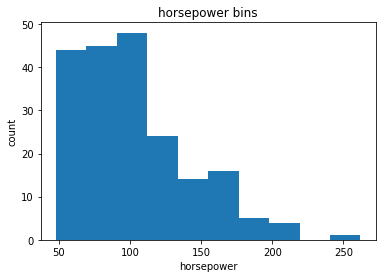

In [314]:
%matplotlib inline 

import matplotlib as plt 
from matplotlib import pyplot 

plt.pyplot.hist(autos_df['horsepower'])

plt.pyplot.xlabel('horsepower')
plt.pyplot.ylabel('count')
plt.pyplot.title('horsepower bins')

<h1> Binning </h1> 

In looking at the horsepower distribution, it looks as though the horsepower can be categorized into three distinct bins: 
* High horsepower vehicles
* Medium horsepower vehicles
* Low horsepower vehicles

In [315]:
#Setting Aside Bins for horsepower with Numpy Arrays 

bins = np.linspace(autos_df['horsepower'].min(),autos_df['horsepower'].max(),4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [316]:
horsepower_group_names = ["Low", "Medium", "High"]

In [319]:
autos_df['horsepower_binned']= pd.cut(autos_df['horsepower'], bins, labels=horsepower_group_names, include_lowest = True)

In [331]:
autos_df.drop('horspower_binned', axis=1, inplace=True)

In [332]:
autos_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,length_normalized,width_normalized,height_normalized,horespower_binned,horsepower_binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,21,27,13495.0,11.190476,8.703704,0.811148,0.890278,0.816054,111,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,21,27,16500.0,11.190476,8.703704,0.811148,0.890278,0.816054,111,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,19,26,16500.0,12.368421,9.038462,0.822681,0.909722,0.876254,154,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,24,30,13950.0,9.791667,7.833333,0.848630,0.919444,0.908027,102,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,18,22,17450.0,13.055556,10.681818,0.848630,0.922222,0.908027,115,Low


In [333]:
#Value Counts in for all the different categorizations of horsepower 
autos_df['horsepower_binned'].value_counts()

Low       153
Medium     43
High        5
Name: horsepower_binned, dtype: int64

In [334]:
x=autos_df['horsepower_binned'].value_counts()

In [335]:
y = horsepower_group_names

Text(0.5, 1.0, 'Horsepower Distribution')

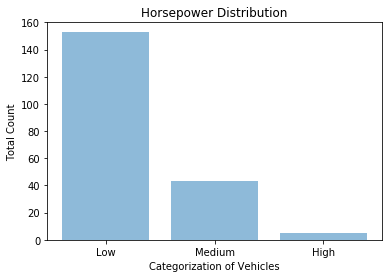

In [370]:
%matplotlib inline 
plt.pyplot.bar(horsepower_group_names, x, align='center', alpha=0.5) 

plt.pyplot.ylim(0,160)
plt.pyplot.xlabel('Categorization of Vehicles')
plt.pyplot.ylabel('Total Count')
plt.pyplot.title('Horsepower Distribution')

<h1> One Final Pre-Processing Technique Before the Next Step </h1> 

As we get to the next steps and gear towards the actual analysis of the data, there is one final precautionary step that I will take in order to ensure our model will be accurate. 

Taking into account whether or not it would be wise to flesh out some indicator variables for some of our pertinent features. 

Since, "fuel-type" and "aspiration" might be pertinent to how cars are priced overall as good measure, I will create a indicator (dummy) variable for fuel type and aspiration.

In [402]:
dummy_variable1 = pd.get_dummies(autos_df['fuel-type'])
dummy_variable1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [403]:
dummy_variable1.rename(columns={'fuel-type-gas':'gas','fuel-type-diesel':'diesel'}, inplace = True)
dummy_variable1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [404]:
#Merging the dummy variable with the df 
autos_df= pd.concat([autos_df,dummy_variable1], axis=1)
autos_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,highway-L/100km,length_normalized,width_normalized,height_normalized,horespower_binned,horsepower_binned,std,turbo,diesel,gas
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,8.703704,0.811148,0.890278,0.816054,111,Low,1,0,0,1
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,8.703704,0.811148,0.890278,0.816054,111,Low,1,0,0,1
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,9.038462,0.822681,0.909722,0.876254,154,Medium,1,0,0,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,7.833333,0.848630,0.919444,0.908027,102,Low,1,0,0,1
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,10.681818,0.848630,0.922222,0.908027,115,Low,1,0,0,1


In [394]:
dummy_variable2 = pd.get_dummies(autos_df['aspiration'])
dummy_variable2.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [396]:
dummy_variable2.rename(columns={'aspiration-type-std': 'std', 'aspiration-type-turbo': 'turbo'}, inplace = True)
dummy_variable2.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [397]:
#Merge The Dummy Variable to the actual dataframe 
autos_df = pd.concat([autos_df,dummy_variable2], axis = 1)
autos_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,horespower_binned,horsepower_binned,diesel,gas,diesel,gas,diesel,gas,std,turbo
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,Low,0,1,0,1,0,1,1,0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,Low,0,1,0,1,0,1,1,0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,154,Medium,0,1,0,1,0,1,1,0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,102,Low,0,1,0,1,0,1,1,0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,115,Low,0,1,0,1,0,1,1,0


In [405]:
autos_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,highway-L/100km,length_normalized,width_normalized,height_normalized,horespower_binned,horsepower_binned,std,turbo,diesel,gas
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,8.703704,0.811148,0.890278,0.816054,111,Low,1,0,0,1
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,8.703704,0.811148,0.890278,0.816054,111,Low,1,0,0,1
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,9.038462,0.822681,0.909722,0.876254,154,Medium,1,0,0,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,7.833333,0.848630,0.919444,0.908027,102,Low,1,0,0,1
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,10.681818,0.848630,0.922222,0.908027,115,Low,1,0,0,1


In [406]:
autos_df.to_csv('Cleaned Automobile Dataset.csv')

<h1> Checkpoint Complete: Data Wrangling </h1> 

<h1 align=center><font size=5>Phase II: Exploratory Data Analysis</font></h1>

In this section, I will focus on conducting means of EDA specifically focusing on uncovering additional insights on relevant characteristics that have the biggest impact on car prices. 

Objectives & Outline: 
* Descriptive Statistics 
* Inferential Statistics 
* ANOVA & Statistical Testing Results 
* Correlation Analysis 
* Advanced Correlation Techniques 
* Takeaways

<h1 align=center><font size=5>Descriptive Statistics</font></h1>

In [407]:
%%capture 
! pip install seaborn
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [408]:
#Checking Datatypes after Conversions to map out our correlations 
autos_df.dtypes

symboling               int64
normalized-losses       int64
make                   object
fuel-type              object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
city-L/100km          float64
highway-L/100km       float64
length_normalized     float64
width_normalized      float64
height_normalized     float64
horespower_binned       int64
horsepower_binned    category
std       

In [409]:
#Mapping out a holistic view of each of our features and their correlations with themselves
#And also with other variables. 
#You can also spot 1.000 throughout the entire table like a diagonal, as each variable will be correlated by 1 to itself.
autos_df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,city-L/100km,highway-L/100km,length_normalized,width_normalized,height_normalized,horespower_binned,std,turbo,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,...,0.066171,-0.029807,-0.365404,-0.242423,-0.550160,0.075776,0.054615,-0.054615,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,...,0.238567,0.181189,0.019424,0.086802,-0.373737,0.217300,0.006911,-0.006911,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,...,0.476153,0.577576,0.876024,0.814507,0.590742,0.371297,-0.256889,0.256889,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,...,0.657373,0.707108,1.000000,0.857170,0.492063,0.579688,-0.230085,0.230085,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,...,0.673363,0.736728,0.857170,1.000000,0.306002,0.614972,-0.305732,0.305732,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,...,0.003811,0.084301,0.492063,0.306002,1.000000,-0.086901,-0.090336,0.090336,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,...,0.785353,0.836921,0.880665,0.866201,0.307581,0.758001,-0.321955,0.321955,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,...,0.745059,0.783465,0.685025,0.729436,0.074694,0.822636,-0.110040,0.110040,0.070779,-0.070779
bore,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,...,0.554726,0.559197,0.608941,0.544879,0.180327,0.566786,-0.227782,0.227782,0.054435,-0.054435
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,...,0.036285,0.047199,0.123913,0.188814,-0.060822,0.097598,-0.218190,0.218190,0.241033,-0.241033


In [410]:
# As per the below, we have an initial huntch that: 
# "Engine-Size" & "Horsepower" might be good indicators of price 
# While highway-mpg is less relevant to this predictor. 

autos_df[['engine-size', 'horsepower', 'highway-mpg', 'price']].corr()

,engine-size,horsepower,highway-mpg,price
engine-size,1.000000,0.822636,-0.679571,0.872335
horsepower,0.822636,1.000000,-0.804592,0.809729
highway-mpg,-0.679571,-0.804592,1.000000,-0.704692
price,0.872335,0.809729,-0.704692,1.000000


<h3> Plotting Key Continious Numerical Variables </h3> 

Now, I will plot Key Continious Numerical Variables such as: 
* Engine-Size 
* Horsepower 
* Highway MPG 
* Peak-RPM 

against price 

(0, 56287.631535522836)

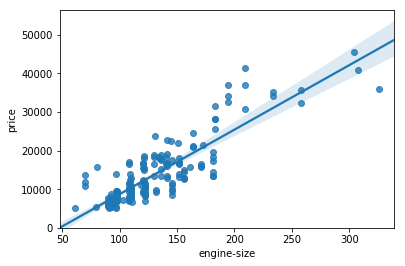

In [418]:
#Engine Size 
sns.regplot(x='engine-size',y='price',data=autos_df)
plt.ylim(0,)

In [427]:
engine_size_price_correlation=autos_df[['engine-size', 'price']].corr()
print("The Correlation of the two variables 1) Engine Size to 2) Price is:", engine_size_price_correlation)

The Correlation of the two variables 1) Engine Size to 2) Price is:              engine-size     price
engine-size     1.000000  0.872335
price           0.872335  1.000000


Takeaway: As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine Size is a good predictor of price since the regression line is almost a perfect diagonal line.

The correlation is approximately 0.87 

(0, 49428.23231491514)

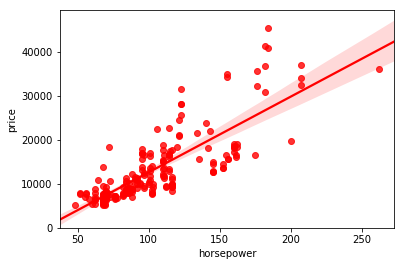

In [422]:
#Horsepower 
sns.regplot(x='horsepower', y='price', data=autos_df, color='red')
plt.ylim(0,)

In [428]:
horsepower_price_correlation=autos_df[['horsepower', 'price']].corr()
print("The Correlation of the two variables 1) Horsepower to 2) Price is:", horsepower_price_correlation)

The Correlation of the two variables 1) Horsepower to 2) Price is:             horsepower     price
horsepower    1.000000  0.809729
price         0.809729  1.000000


Takeaway: As the horsepower goes up, the price goes up: this indicates a positive direct correlation between these two variables. Horsepower is a good predictor of price since the regression line is almost a perfect diagonal line.

The correlation between these two variables is approximately 0.81. 

(0, 48272.17489704951)

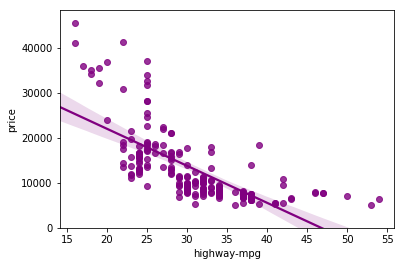

In [432]:
#Highway MPG 
sns.regplot(x='highway-mpg', y='price', data=autos_df, color='purple')
plt.ylim(0,)

In [431]:
highwaympg_price_correlation = autos_df[['highway-mpg', 'price']].corr()
print("The Correlation of the two variables 1) Highway Miles Per Gallon and 2) Price is:", highwaympg_price_correlation)

The Correlation of the two variables 1) Highway Miles Per Gallon and 2) Price is:              highway-mpg     price
highway-mpg     1.000000 -0.704692
price          -0.704692  1.000000


Takeaway: As the highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Though this relationship is negative, highway mpg could potentially be a predictor of price.

The correlation is approximatelty -0.70

In this case, however, the data is randomized: 

1. Some vehicles that have high fuel efficiency are priced low 
2. Some vehicles that have low fuel efficiency are priced high 

(0, 47414.11517660044)

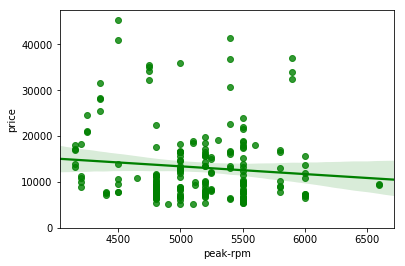

In [433]:
#Peak-RPM 

sns.regplot(x='peak-rpm', y='price', data=autos_df, color='green')
plt.ylim(0,)

In [434]:
peakrpm_price_correlation = autos_df[['peak-rpm', 'price']].corr()

print("The Correlation of the two variables 1) Peak-RPM and 2) Price is:", peakrpm_price_correlation)

The Correlation of the two variables 1) Peak-RPM and 2) Price is:           peak-rpm     price
peak-rpm  1.000000 -0.101542
price    -0.101542  1.000000


 <p> Takeaway: Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.</p>
 
 The Correlation is approximately -0.10

<h3> Plotting Key Categorical Variables </h3> 

Now, that I have examined some of our Key Continious Numerical Variables, I will need to take a look at some of the key Categorical Variables in our dataset. From my above code which ran data-types, some of the key categorical variables I would like to examine against price are the following: 
* Body Style
* Engine-Location
* Drive-Wheels
* Num-Of-Cylinders 

One means of analyzing categorical variables against price would be by using boxplots.


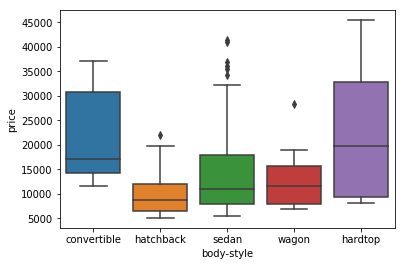

In [436]:
#BodyStyle & Price 
sns.boxplot(x='body-style', y='price', data=autos_df)

<p> As we can see above, it is clearly evident the distributions of price between the different body-style categories have a significant overlap. Thus, body-style may not be the best indicator of price </p> 

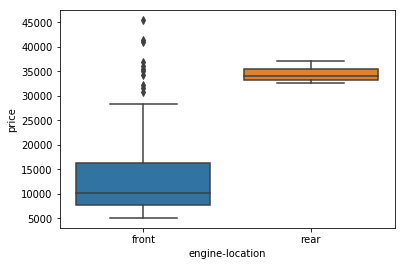

In [445]:
#Engine Location & Price 
sns.boxplot(x='engine-location', y='price', data=autos_df)

<p> Unlike the categorical variable, body-style, engine-location will be a good indicator of price. There is a clear distinction between the price of front-faced engine vehicles from that of rear-faced engine vehicles. In this case, engine location has a substantial impact on price </p> 

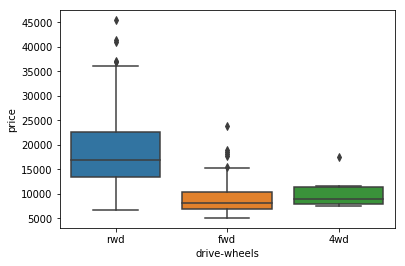

In [447]:
#Drive Wheels & Price 
sns.boxplot(x='drive-wheels', y='price', data=autos_df)

Similar to the categorical variable, engine-location, drive-wheels will be a potentially good indicator of price. There is a clear distinction in the box plots between the three unique categories of drive wheels (rwd, fwd, 4wd) and their respective impacts on price. 

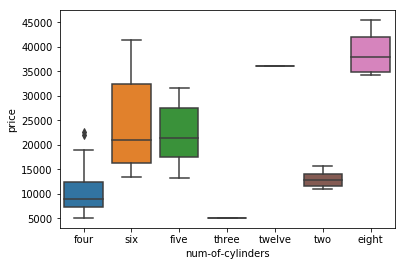

In [451]:
#NumOfCylinders & Price 
sns.boxplot(x='num-of-cylinders', y='price', data=autos_df)

Number of Cylinders might not be the best predictor of price. Most of the results overlap with each other. A few of the results do not have enough value counts to be statistically significant. The only insight captured from this is that eight cylinder vehicles typically reveal higher prices overall. 

<h1 align=center><font size=5>Descriptive Statistics Analysis</font></h1>

In [455]:
#Describe our DataFrame with basic descriptive statistics 
#All Numerical Variables 
autos_df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,city-L/100km,highway-L/100km,length_normalized,width_normalized,height_normalized,horespower_binned,std,turbo,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,...,9.944145,8.044957,0.837102,0.915126,0.899108,103.393035,0.820896,0.179104,0.099502,0.900498
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,...,2.534599,1.840739,0.059213,0.029187,0.040933,37.365623,0.384397,0.384397,0.300083,0.300083
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,...,4.795918,4.351852,0.678039,0.837500,0.799331,48.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,...,7.833333,6.911765,0.801538,0.890278,0.869565,70.000000,1.000000,0.000000,0.000000,1.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,...,9.791667,7.833333,0.832292,0.909722,0.904682,95.000000,1.000000,0.000000,0.000000,1.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,...,12.368421,9.400000,0.881788,0.925000,0.928094,116.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,...,18.076923,14.687500,1.000000,1.000000,1.000000,262.000000,1.000000,1.000000,1.000000,1.000000


In [454]:
#Exploring the non-numerical, Categorical Variable, in our dataset. 
autos_df.describe(include=['object'])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,181,165,115,94,118,198,145,157,92


<h3> Analayzing Value Counts</h3> 

Analyzing value counts will allow us to understand how many units of each characteristic/variable we have. 

We will be able to put more context to our box plots. 

* Body-Style 
* Engine-Location 
* Drive-Wheels

In [466]:
#Body-Style 
autos_df['body-style'].value_counts().to_frame()

,body-style
sedan,94
hatchback,68
wagon,25
hardtop,8
convertible,6


In [473]:
body_style_value_counts = autos_df['body-style'].value_counts().to_frame()
body_style_value_counts.rename(columns={'body-style':'value_counts'},inplace=True)
body_style_value_counts.index.name = 'Body-Styles'
body_style_value_counts

,value_counts
Body-Styles,
sedan,94
hatchback,68
wagon,25
hardtop,8
convertible,6


In [475]:
#Engine Location Value Counts 
autos_df['engine-location'].value_counts().to_frame()

,engine-location
front,198
rear,3


In [476]:
engine_location_value_counts = autos_df['engine-location'].value_counts().to_frame()
engine_location_value_counts.rename(columns={'engine-location':'value_counts'}, inplace=True)
engine_location_value_counts.index.name = 'Engine-Location'
engine_location_value_counts

,value_counts
Engine-Location,
front,198
rear,3


In [462]:
#Engine-Location Value Counts 
autos_df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [464]:
drive_wheel_counts = autos_df['drive-wheels'].value_counts().to_frame()
drive_wheel_counts.rename(columns={'drive-wheels': 'value-counts'}, inplace=True)
drive_wheel_counts.index.name = 'drive-wheels'
drive_wheel_counts

,value-counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [478]:
#Num Of Cylinders Value Counts 
autos_df['num-of-cylinders'].value_counts().to_frame()

,num-of-cylinders
four,157
six,24
five,10
eight,4
two,4
three,1
twelve,1


In [479]:
num_of_cylinders_value_counts = autos_df['num-of-cylinders'].value_counts().to_frame()
num_of_cylinders_value_counts.rename(columns={'num-of-cylinders':'value_counts'}, inplace=True)
num_of_cylinders_value_counts.index.name = 'Num-Of-Cylinders'
num_of_cylinders_value_counts

,value_counts
Num-Of-Cylinders,
four,157
six,24
five,10
eight,4
two,4
three,1
twelve,1


From the above, it is clear that both engine-location and number of cylinders would be poor predictors of price. Though our box-plot showed engine-location as a possible predictor. When you look at the counts it is extremely skewed as: 
* Front: 198 
* Rear: 3 

Similarly, when we look at Num-Of-Cylinders, though the boxplot for this variable showed potential promise, it is also extremely skewed: 
* Four: 157 is the predominant number of cylinders. 

The rest of the counts are not statistically significant

<h3> Grouping Our Data </h3> 


From both our boxplot and value_counts analysis, we now know that boxplots will be a good variable to consider when grouping our data before conducting further analysis. 

In [480]:
autos_df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [499]:
df_group_one = autos_df[['drive-wheels','price']]

In [500]:
df_group_one = df_group_one.groupby (['drive-wheels'], as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


<p>From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.</p>

In [503]:
df_group_two = autos_df[['drive-wheels', 'body-style', 'price']]
df_group_two = df_group_two.groupby(['drive-wheels', 'body-style'], as_index = False).mean()
df_group_two

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [505]:
df_group_three = autos_df[['body-style', 'price']]
df_group_three = df_group_three.groupby(['body-style'], as_index = False).mean() 
df_group_three

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [509]:
#The Data will be much easier to digest once I translate this into a Pivot Table. 
grouped_pivot = df_group_two.pivot(index='body-style', columns = 'drive-wheels')
grouped_pivot

price                            
drive-wheels           4wd           fwd           rwd
body-style                                            
convertible            NaN  11595.000000  23949.600000
hardtop                NaN   8249.000000  24202.714286
hatchback      7603.000000   8396.387755  14337.777778
sedan         12647.333333   9811.800000  21711.833333
wagon          9095.750000   9997.333333  16994.222222

In [513]:
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                            
drive-wheels           4wd           fwd           rwd
body-style                                            
convertible       0.000000  11595.000000  23949.600000
hardtop           0.000000   8249.000000  24202.714286
hatchback      7603.000000   8396.387755  14337.777778
sedan         12647.333333   9811.800000  21711.833333
wagon          9095.750000   9997.333333  16994.222222

<h3> Takeaways Based on the Above Data </h3> 

Our variable drived wheels was always a good indicator of price. Initially, we deemed body-style as an ineffective indicator of price. However, joining the two variables together in a pivot table. It is clear that both variables combined do, indeed, provide us some valuable insight. 

Takeways From our Pivot Table: 

In [516]:
#Max - Average for each respective Drive-Wheel Classification 
grouped_pivot.max().to_frame()

0
      drive-wheels              
price 4wd           12647.333333
      fwd           11595.000000
      rwd           24202.714286

In [517]:
# Min - Average for each respective Drive-Wheel Classification 
grouped_pivot.min().to_frame()

0
      drive-wheels              
price 4wd               0.000000
      fwd            8249.000000
      rwd           14337.777778

In [519]:
%matplotlib inline

<h3> Variables: Drive Wheels and Body Styles vs Price </h3> 

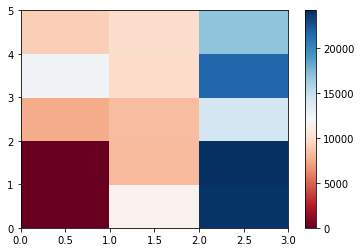

In [528]:
#Using our grouped pivot results 
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

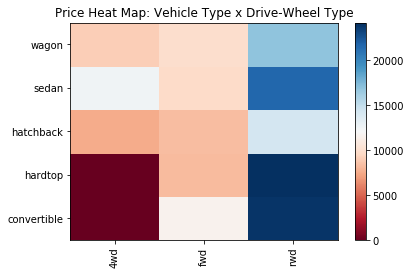

In [536]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#Title 
plt.title('Price Heat Map: Vehicle Type x Drive-Wheel Type')
#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<h3> Takeaways Based on this Visualization <h/3> 

<h3> Expanding on  Correlation - The Extent of Intertependence Between our Variables </h3> 

As previously outlined, we did measure corrrelation for some of our continious numerical variables including: 
* Engine-Size 
* Horsepower 
* Highway MPG 
* Peak-RPM 

Now, we would like to take this analysis one-step further and measure the different p-values for these features,  that we can determine if the correlation between these two variables is statistically significant. 

We will measure our results at the 0.05 significance level, deeming us 95% condifent that the correlation between the variables is signficiant. 


In [537]:
from scipy import stats 

In [566]:
#Wheel Base Vs. Price 
# Calculating the Pearson Correlation Coefficient and the P-Value of 'Wheel Base' and 'Price'
pearsons_coef, p_value = stats.pearsonr(autos_df['wheel-base'], autos_df['price'])
print("The Pearsons Correlation Coefficient between Wheel Base and Price is:", pearsons_coef) 
print("The p-value is:", p_value)
print("")

#Horsepower vs. Price
pearsons_coef1, p_value2 = stats.pearsonr(autos_df['horsepower'],autos_df['price'])
print("The Pearsons Correlation Coefficient between Horsepower and Price is:", pearsons_coef1) 
print("The p-value is:", p_value2)
print(" ")

#Length vs. Price 
pearsons_coef3, p_value3 = stats.pearsonr(autos_df['length'], autos_df['price'])
print("The Pearsons Correlation Coefficient between Length and Price is:", pearsons_coef3) 
print("The p-value is:", p_value3)
print("")

#Width vs. Price 
pearsons_coef4, p_value4 = stats.pearsonr(autos_df['width'], autos_df['price'])
print("The Pearsons Correlation Coefficient between Width and Price is:", pearsons_coef4) 
print("The p-value is:", p_value4)
print(" ")

#Engine-Size vs. Price 
pearsons_coef5, p_value5 = stats.pearsonr(autos_df['engine-size'], autos_df['price'])
print("The Pearsons Correlation Coefficient between Engine-Size and Price is:", pearsons_coef5) 
print("The p-value is:", p_value5)
print(" ")

#Bore vs. Price 
pearsons_coef6, p_value6 = stats.pearsonr(autos_df['bore'], autos_df['price'])
print("The Pearsons Correlation Coefficient between Bore and Price is:", pearsons_coef6) 
print("The p-value is:", p_value6)
print(" ")

#City-Mpg vs. Price 
pearsons_coef7, p_value7 = stats.pearsonr(autos_df['city-mpg'],autos_df['price'] )
print("The Pearsons Correlation Coefficient between City-Mpg and Price is:", pearsons_coef7) 
print("The p-value is:", p_value7)
print("")

#Highway-Mpg vs. Price 
pearsons_coef8, p_value8 = stats.pearsonr(autos_df['highway-mpg'], autos_df['price'])
print("The Pearsons Correlation Coefficient between Highway MPG and Price is:", pearsons_coef8)
print("The p-value is:", p_value8)
print(" ")

The Pearsons Correlation Coefficient between Wheel Base and Price is: 0.5846418222655081
The p-value is: 8.076488270732955e-20

The Pearsons Correlation Coefficient between Horsepower and Price is: 0.8097290352560286
The p-value is: 5.924001027593048e-48
 
The Pearsons Correlation Coefficient between Length and Price is: 0.690628380448364
The p-value is: 8.016477466159053e-30

The Pearsons Correlation Coefficient between Width and Price is: 0.7512653440522673
The p-value is: 9.20033551048166e-38
 
The Pearsons Correlation Coefficient between Engine-Size and Price is: 0.8723351674455185
The p-value is: 9.265491622197996e-64
 
The Pearsons Correlation Coefficient between Bore and Price is: 0.5431537659807731
The p-value is: 8.051208825441229e-17
 
The Pearsons Correlation Coefficient between City-Mpg and Price is: -0.6865710067844677
The p-value is: 2.3211320655676368e-29

The Pearsons Correlation Coefficient between Highway MPG and Price is: -0.7046922650589529
The p-value is: 1.7495471

<h3> Conclusions </h3> 


Wheel Base & Price: 
* Since the p-value is <0.001, the correlation between the wheel-base and price is, indeed, statistically significant though the linear relationship is only moderately strong at ~ 0.58. 

Horsepower & Price: 
* Since the p-value is <0.001, the correlation between the horsepower and price is, indeed, statistically significant though the linear relationship is strong at approximately ~ 0.81. 

Length & Price: 
* Since the p-valye is <0.001, the correlation between the horsepower and price is, indeed, statistically significant while the linear relationship is relatively strong at approximately ~ 0.69. 

Width & Price: 
* Since the p-value is <0.001, the correlation between the width and price is, indeed, statistically significant while the linear relationship is relatively strong at approximately ~ 0.75. 

Engine-Size & Price: 
* Since the p-value is <0.001, the correlation between engine-size and price is, indeed, statistically significant while the linear relationship is extremely strong at approximately ~ 0.87. 

Bore & Price: 
* Since the p-value is <0.001, the correlation between bore and price is, indeed, statistically significant; however, the linear relationship is not strongly correlated at approximately ~ 0.54.

City-Mpg & Price: 
* Since the p-value is <0.001, the correlation between City-Mpg and Price is, indeed, statistically significant; however, the negative linear relationship is moderately correlated at approximately ~ -0.68.

Highway Mpg & Price: 
* Since the p-value is <0.001, the correlation between Highway-Mpg and Price is, indeed, statistically significant; however, the negative linear relationship is moderately correlated at approximately ~ -0.70.

<h3> ANOVA Analysis </h3> 

In [569]:
anova_group_test = autos_df[['drive-wheels', 'price']]

In [571]:
groupby_anova_test = anova_group_test.groupby(['drive-wheels'])
groupby_anova_test.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [572]:
groupby_anova_test.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [574]:
#Anova - Drive Wheels & Price
f_val, p_val = stats.f_oneway(groupby_anova_test.get_group('fwd')['price'], groupby_anova_test.get_group('rwd')['price'], groupby_anova_test.get_group('4wd')['price'])
print("ANOVA results: F=",f_val,"ANOVA results:P=",p_val)

ANOVA results: F= 67.95406500780399 ANOVA results:P= 3.3945443577151245e-23


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. Below, we will check our other groups to see if they also maintain this large F value and small p-value. 

In [575]:
#Anova fwd and rwd 

f_val,p_val = stats.f_oneway(groupby_anova_test.get_group('fwd')['price'],groupby_anova_test.get_group('rwd')['price'])
print("ANOVA results: F=",f_val,"ANOVA results:P=",p_val)

ANOVA results: F= 130.5533160959111 ANOVA results:P= 2.2355306355677845e-23


In [576]:
#Anova 4wd and rwd 
f_val,p_val = stats.f_oneway(groupby_anova_test.get_group('4wd')['price'], groupby_anova_test.get_group('rwd')['price'])
print("ANOVA results: F=",f_val,"ANOVA results:P=",p_val)

ANOVA results: F= 8.580681368924756 ANOVA results:P= 0.004411492211225333


In [577]:
#ANOVA 4wd and fwd 
f_val,p_val = stats.f_oneway(groupby_anova_test.get_group('4wd')['price'], groupby_anova_test.get_group('fwd')['price'])
print("ANOVA results: F =",f_val, "ANOVA results:P=",p_val)

ANOVA results: F = 0.665465750252303 ANOVA results:P= 0.41620116697845666


<h3> Concluding Notes </h3>

After conducting a variety of different tests, here is what variables seem critical to incorporate in our overall model. 


Continious Numerical Variables: 
* Length 
* Width 
* Curb-Weight 
* Engine Size 
* Horsepower 
* City-MPG 
* Highway-MPG 
* Wheelbase 
* Bore 

Categorical Variables 
* Drive Wheels 

<h1 align=center><font size=5>Phase III: Model Development</font></h1>

In [578]:
from sklearn.linear_model import LinearRegression

<h1 align=center><font size=5>Part I: Simple Linear Regression</font></h1>


In [581]:
lm =  LinearRegression ()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<h3> How could some of our continious numerical variables help influence and predict car price </h3> 

In [582]:
x = autos_df[['highway-mpg']]
y = autos_df [['price']]

In [584]:
lm.fit(x,y)
lm.fit

<bound method LinearRegression.fit of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)>

In [586]:
Yhat = lm.predict(x)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [587]:
#value of y^ = a +bx 
#Value of Intercept = a 
lm.intercept_

array([38423.30585816])

In [588]:
#value of the intercept (a)
lm.coef_

array([[-821.73337832]])

<h3> The Estimated Linear Model based on this continuous numerical variable (highway mpg) <h/3> 
    

𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋
Plugging in the actual values we get:

price = 38423.31 - 821.73 x highway-mpg

<h3> Other Continuous Numerical Variables </h3> 

 Below I will continue to explore other continious numerical variables and the respective estimated linear models that they are able to produce

In [590]:
#Engine-Size = Linear Model 1 

lm1 = LinearRegression()
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [593]:
x1 = autos_df[['engine-size']]
y1 = autos_df [['price']]


In [594]:
lm.fit(x1,y1)
lm.fit

<bound method LinearRegression.fit of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)>

In [597]:
yhat = lm.predict(x1)
yhat[0:5]

array([[13728.4631336 ],
       [13728.4631336 ],
       [17399.38347881],
       [10224.40280408],
       [14729.62322775]])

In [601]:
lm.intercept_

array([-7963.33890628])

In [602]:
lm.coef_

array([[166.86001569]])

he Estimated Linear Model based on this continuous numerical variable (highway mpg) 
𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋 Plugging in the actual values we get:

price = -7963 + 166.866 x engine-size

<h3> Other Variables Needed to Check </h3> 

* Length
* Width
* Curb-Weight
* Horsepower 
* City MPG 
* Wheel Base 
* Bore 

In [604]:
#Length = Lm2 
lm2 = LinearRegression()
lm2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [608]:
autos_df[['length']].astype('float', inplace = True)

,length
0,168.8
1,168.8
2,171.2
3,176.6
4,176.6
5,177.3
6,192.7
7,192.7
8,192.7
9,176.8


In [613]:

x2=autos_df[['length']]
y2=autos_df[['price']]

In [614]:
lm.fit(x2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [615]:
yhat = lm.predict(x2)
yhat[0:5]

array([[10801.45044105],
       [10801.45044105],
       [11870.44409178],
       [14275.67980594],
       [14275.67980594]])

In [617]:
#Intercept 
lm.intercept_

array([-64384.43632742])

In [618]:
#Slope 
lm.coef_

array([[445.41402114]])

<h3> Estimated Linear Model Based on Length </h3> 
The Estimated Linear Model based on this continuous numerical variable (length) 𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋 Plugging in the actual values we get:

price = -64384 + 445.41402114 x length - additional - units 

In [619]:
#Width 
lm3 = LinearRegression () 
lm3

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [620]:
x3 = autos_df [['width']]
y3 = autos_df [['price']]

In [621]:
lm.fit(x3,y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [622]:
yhat = lm.predict(x3)
yhat[0:5]

array([[ 8124.35937942],
       [ 8124.35937942],
       [12101.81063257],
       [14090.53625914],
       [14658.74358102]])

In [623]:
#Intercept
lm.intercept_

array([-173986.08728234])

In [624]:
#Slope 
lm.coef_

array([[2841.03660939]])

<h3> Estimatedd Linear Model Based on Width </h3> 
The Estimated Linear Model based on this continuous numerical variable (length) 
* 𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋 Plugging in the actual values we get:
* price = -173986 + 2841 x width - additional - units

In [625]:
lm4 = LinearRegression()
lm4

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [626]:
x4=autos_df[['curb-weight']]
y4=autos_df[['price']]

In [627]:
lm.fit(x4,y4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [628]:
yhat = lm.predict(x4)
yhat[0:5]

array([[13108.85152621],
       [13108.85152621],
       [16634.03445191],
       [10404.07480868],
       [16646.85329891]])

In [629]:
#Intercept 
lm.intercept_

array([-19553.57063623])

In [630]:
#Slope 
lm.coef_

array([[12.818847]])

<h3> Estimatedd Linear Model Based on Horsepower </h3> 
The Estimated Linear Model based on this continuous numerical variable (horsepower) 
* 𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋 Plugging in the actual values we get:
* price = -19553 + 12.818847 x horsepower_additional_units

In [632]:
#Horsepower 
lm5 = LinearRegression()
lm5 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [633]:
x5=autos_df[['horsepower']] 
y5= autos_df[['price']]

In [634]:
lm.fit(x5,y5)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [635]:
yhat = lm.predict(x5)
yhat[0:5]

array([[14517.17297231],
       [14517.17297231],
       [21922.47513036],
       [12967.226009  ],
       [15206.03828934]])

In [636]:
#Intercept
lm.intercept_

array([-4598.83957522])

In [637]:
#Slope
lm.coef_

array([[172.21632926]])

<h3> Estimatedd Linear Model Based on City MPG </h3> 
The Estimated Linear Model based on this continuous numerical variable (city_mpg) * 𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋 Plugging in the actual values we get: * price = -4598.83957522 + 172.21632926 x city_mpg - additional - units

In [639]:
#City-MPG 
lm6 = LinearRegression()
lm6 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [640]:
x6 = autos_df[['city-mpg']]
y6 = autos_df[['price']]

In [641]:
lm.fit(x6,y6)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [643]:
yhat = lm.predict(x6)
yhat[0:5]

array([[16757.08312743],
       [16757.08312743],
       [18455.98957651],
       [14208.72345381],
       [19305.44280105]])

In [644]:
#Intercept
lm.intercept_

array([34595.60084278])

In [645]:
lm.coef_

array([[-849.45322454]])

<h3> Estimated Linear Model Based on Wheel Base </h3> 
The Estimated Linear Model based on this continuous numerical variable (wheel-base) * 𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋 Plugging in the actual values we get: * price = -34595 - 849.45322354 x per additional wheel base unit

In [646]:
#Wheel-Base 
lm7 = LinearRegression() 
lm7

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [647]:
x7 = autos_df[['wheel-base']]
y7 = autos_df[['price']]

In [648]:
lm.fit(x7,y7)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [649]:
yhat = lm.predict(x7)
yhat[0:5]

array([[ 5397.30627159],
       [ 5397.30627159],
       [ 9916.07539362],
       [13975.30867274],
       [13668.95144413]])

In [651]:
#Intercept
lm.intercept_

array([-62460.81986607])

In [650]:
#Slope 
lm.coef_

array([[765.89307153]])

<h3> Estimated Linear Model Based on Bore </h3> 
The Estimated Linear Model based on this continuous numerical variable (length) * 𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋 Plugging in the actual values we get: * price = -62460.81986607 + 765.89307153 x per additional wheel-base unit

In [652]:
#Bore 
lm8 = LinearRegression() 
lm8

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [653]:
x8 = autos_df[['bore']]
y8 = autos_df[['price']]

In [654]:
lm.fit(x8,y8)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [655]:
yhat = lm.predict(x8)
yhat[0:5]

array([[15449.95929851],
       [15449.95929851],
       [ 2729.41905132],
       [10941.41338811],
       [10941.41338811]])

In [657]:
#Intercept
lm.intercept_

array([-40423.80609106])

In [658]:
lm.coef_

array([[16101.94967999]])

<h3> Estimated Linear Model Based on Bore </h3> 

The Estimated Linear Model based on this continuous numerical variable (bore) * 𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋 Plugging in the actual values we get: * price = -40423 + 16101.94967999 x per additional bore unit



<h1 align=center><font size=5>Part II: Multiple Linear Regression</font></h1>

Predicting the price of cars using more than one variable using <b> Multiple Linear Regression </b> in order to explain the relationship between one continious response (dependent) variable and <b> two or more </b> response (independent) variables. 

The predictor variables to consider with MLR will be as follows: 
* Horsepower 
* Curb-Weight 
* Engine-Size 
* Highway MPG 

In [659]:
#Create a variable that captures the variables from our data frame and then fit the model to this df. 
z = autos_df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [660]:
lm.fit(z, autos_df[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [662]:
yhat = lm.predict(z)
yhat

array([[13698.95609311],
       [13698.95609311],
       [19056.78572196],
       [10621.59764327],
       [15519.32197778],
       [13867.78444008],
       [15454.84783873],
       [15972.88040209],
       [17614.41285158],
       [10723.08344825],
       [10723.08344825],
       [17804.21572846],
       [18063.23201014],
       [19319.30373461],
       [26972.27689965],
       [27678.68494059],
       [28194.2579827 ],
       [  656.80024158],
       [ 5651.63043174],
       [ 5816.45897463],
       [ 5480.62393393],
       [ 5370.97344591],
       [ 8741.42975453],
       [ 5799.52765742],
       [ 5903.13417009],
       [ 5903.13417009],
       [ 9038.12113173],
       [11861.57965459],
       [18769.99450146],
       [ 4814.41324913],
       [ 5694.73017907],
       [ 4008.30220222],
       [ 6118.36534807],
       [ 6193.71553911],
       [ 6448.02243385],
       [ 6513.953851  ],
       [ 9478.44648129],
       [ 9728.04398909],
       [ 9798.68479319],
       [10118.92310508],


In [661]:
#Intercept 
lm.intercept_

array([-15831.9309603])

In [663]:
#Coefficiant
lm.coef_

array([[53.66247317,  4.70938694, 81.44600167, 36.55016267]])

<h3> Estimated Multiple Linear Regression Model </h3> 
$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

price = -14831.9309603 + 53.66247317 x <b> horsepower </b> + 4.70938694 x <b> curb-weight </b> + 81.44600167 x <b> engine-size </b> + 36.55016267 x <b> highway-mpg </b> 

<h1 align=center><font size=5>Model Evaluation Using Visualization</font></h1>

In [665]:
import seaborn as sns 
%matplotlib inline

For our SLR models, the best way to visualize these will be to use <b> regression plots </b>. Not only will this plot show a combination of a scattered data points (a <b> scatter plot</b>), but also it will show a <b> fitted linear regression line </b> going through the data. 

This will help us get a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (<i> positive or negative correlation</i>) 

Text(0, 0.5, 'price')

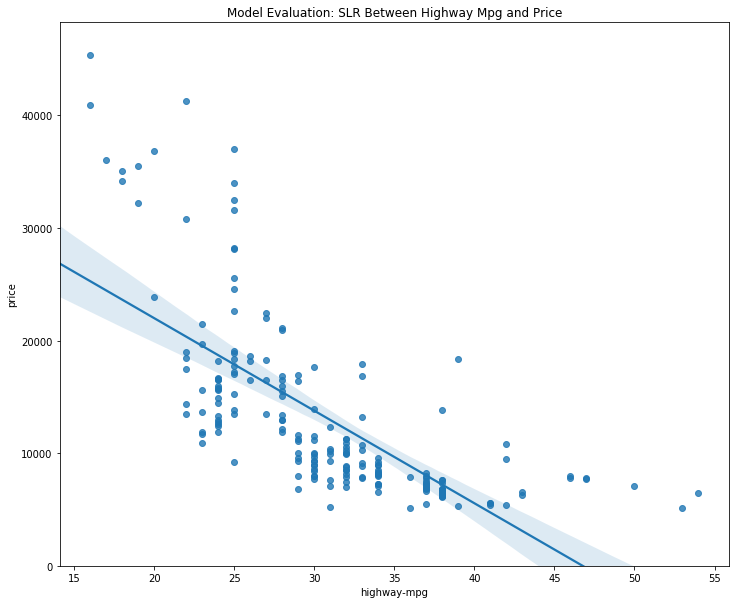

In [673]:
#Though we did this in our exploratory data analysis Phase 1, we will recover some relevant variables now that we have done SLR 

width = 12
height = 10 
plt.figure(figsize = (width, height))
sns.regplot(x='highway-mpg', y='price', data=autos_df)
plt.ylim(0,)
plt.title('Model Evaluation: SLR Between Highway Mpg and Price')
plt.xlabel ('highway-mpg')
plt.ylabel ('price')


In [674]:
autos_df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<b> price </b> = 38423.31 - 821.73 x <b> highway-mpg </b>. 
We can see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative.

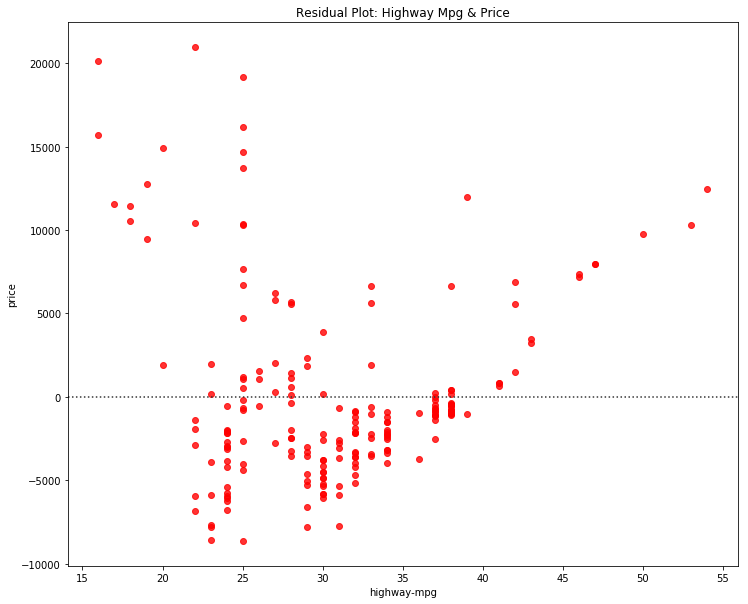

In [693]:
width = 12 
height = 10 
plt.figure(figsize=(width,height))
sns.residplot(x='highway-mpg',y='price',data=autos_df, color = 'red')
plt.title('Residual Plot: Highway Mpg & Price')
plt.show()


This Residual Plot shows us that there is a <b> curvilinear relationship </b> between <b> highway-mpg </b> and <b> price </b>. e can see from the residual plot that residuals are not randomly spread around the x-axis, which leads us to believe a more non-linear model is more appropriate for this data. 

(0, 47846.08770262283)

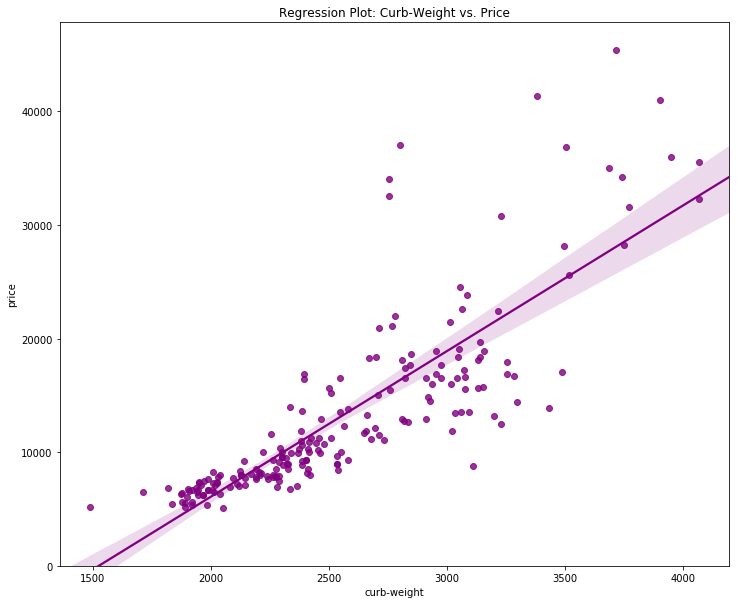

In [702]:
#Curb-Weight
plt.figure(figsize=(width,height))
sns.regplot(x='curb-weight',y='price', data=autos_df, color='purple')
plt.title('Regression Plot: Curb-Weight vs. Price')
plt.xlabel('curb-weight')
plt.ylabel('price')
plt.ylim(0,)

In [700]:
autos_df[['curb-weight', 'price']].corr()

,curb-weight,price
curb-weight,1.000000,0.834415
price,0.834415,1.000000


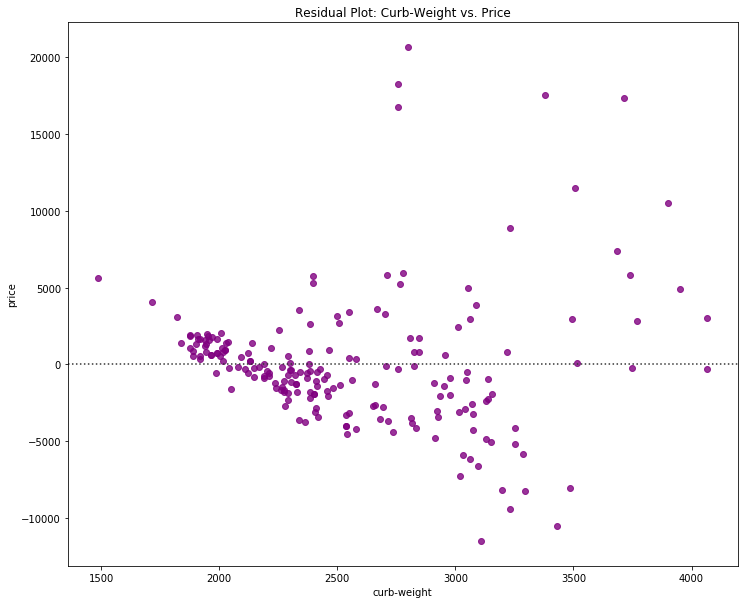

In [701]:
#Curb-Weight Resiudal Plot 
plt.figure(figsize=(width,height))
sns.residplot(x='curb-weight',y='price',data=autos_df,color='purple')
plt.title('Residual Plot: Curb-Weight vs. Price')
plt.show()

This Residual Plot shows us that there is a <b> curvilinear relationship </b> between <b> curb-weight </b> and <b> price </b>. e can see from the residual plot that residuals are not randomly spread around the x-axis, which leads us to believe a more non-linear model is more appropriate for this data. 

(0, 56080.011629786386)

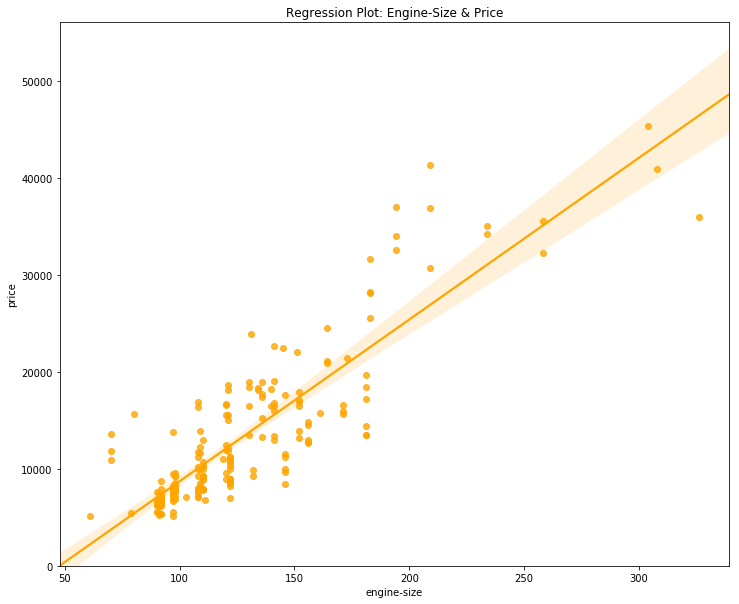

In [760]:
#Engine-Size Regression Plot 
plt.figure(figsize=(width,height))
sns.regplot(x='engine-size',y='price',data=autos_df, color = 'orange')
plt.title('Regression Plot: Engine-Size & Price')
plt.ylim(0,)

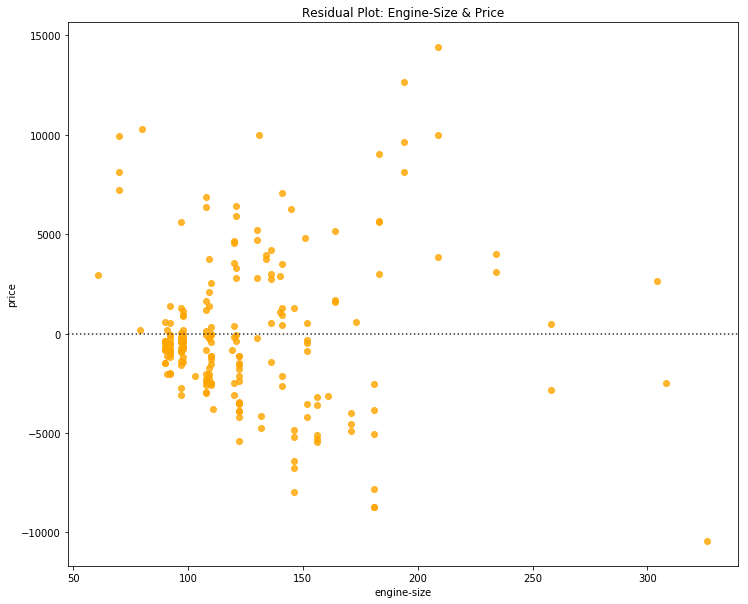

In [759]:
#Engine-Size Residual Plot 
plt.figure(figsize=(width,height))
sns.residplot(x='engine-size',y='price',data=autos_df, color='orange')

plt.title ('Residual Plot: Engine-Size & Price')
plt.show()


(0, 49335.272625002646)

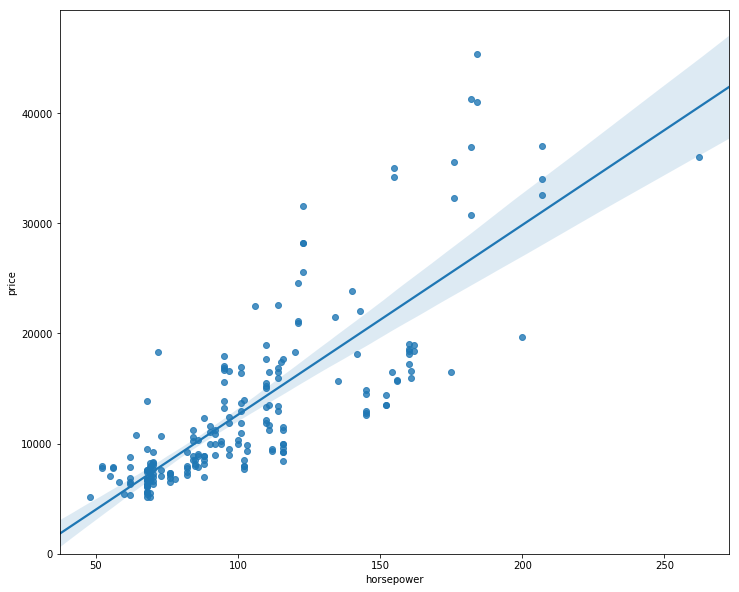

In [688]:
#Horsepower Regression Plot 
plt.figure(figsize=(width,height))
sns.regplot(x='horsepower',y='price',data=autos_df)
plt.ylim(0,)



In [ ]:
#Horsepower 

In [689]:
autos_df[['horsepower','price']].corr()

,horsepower,price
horsepower,1.000000,0.809729
price,0.809729,1.000000


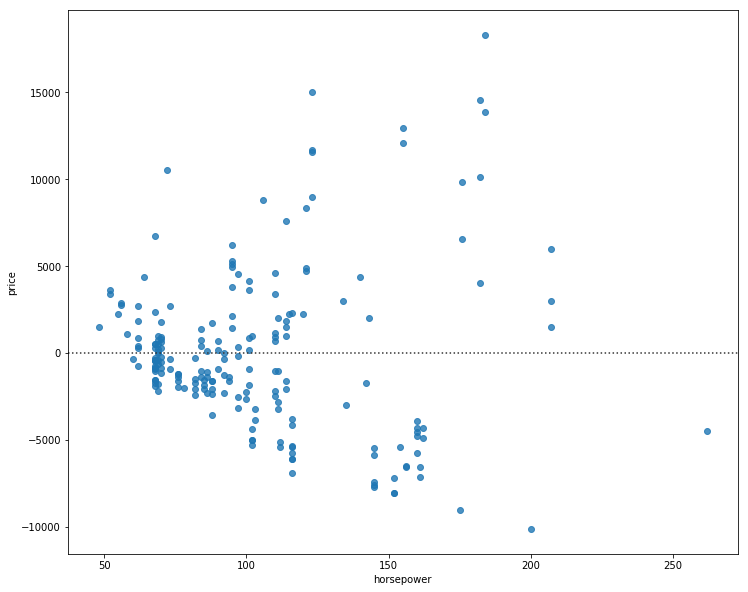

In [692]:
#Horsepower Residual Plot 
plt.figure(figsize=(width,height))
sns.residplot(x='horsepower',y='price',data=autos_df)
plt.show()

<h3> Conclusion of Model Evaulation from Visualization </h3> 

After plotting and testing all of our continuous numerical variables, it is <b> clearly evident </b> that the only feature with a strong linear correlation and non-curvilinear residual plot is <b> horsepower</b>. 

Thus, we could proceed with a <b> Simple Linear Regression Model </b> for <b> horsepower </b>. The resulting SLR equation featuring yhat would be as follows: 
* The Estimated Linear Model based on this continuous numerical variable (horsepower) * 𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋 Plugging in the actual values we get: * price = -4598.83957522 + 172.21632926 x horsepower - additional - units. 

Though this would be useful in predicting price, it only takes into account one feature. Due to the fact that in most situations, we will need to look at multiple features (predictors) in price to have an accurate model, it is most advised that we perform <b> Multiple Linear Regression </b> instead. 

<h3> Recount our Multiple Linear Regression Model </h3> 
$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

price = -14831.9309603 + 53.66247317 x <b> horsepower </b> + 4.70938694 x <b> curb-weight </b> + 81.44600167 x <b> engine-size </b> + 36.55016267 x <b> highway-mpg </b> 

<h3> Distribution Plot: Visualizing a model for our MLR </h3> 

In [ ]:
#Recounting our Previous Steps for Reference 

In [718]:
#Create a variable that captures the variables from our data frame and then fit the model to this df. 
z = autos_df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [719]:
lm.fit(z, autos_df[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [720]:
yhat=lm.predict(z)

In [721]:
#Intercept 
lm.intercept_

array([-15831.9309603])

In [722]:
lm.coef_

array([[53.66247317,  4.70938694, 81.44600167, 36.55016267]])

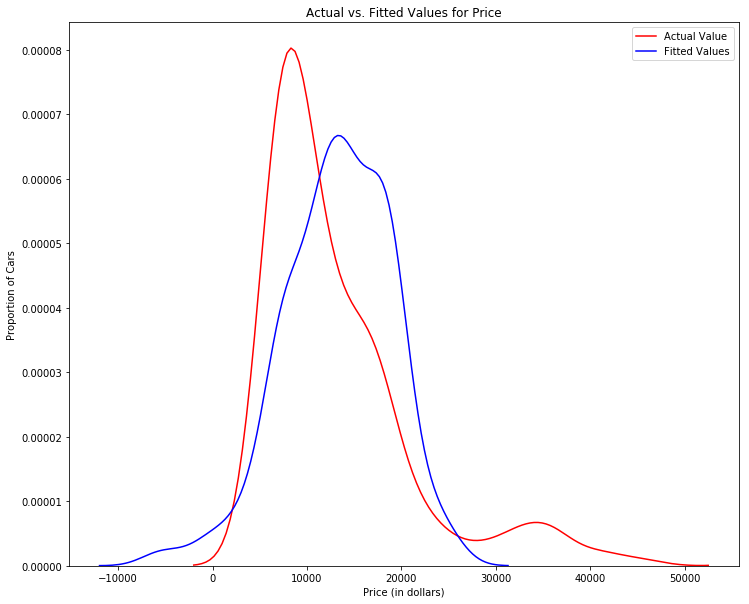

In [725]:
plt.figure(figsize=(width,height))
ax1 = sns.distplot(autos_df['price'], hist = False, color = "red", label='Actual Value')
sns.distplot(Yhat, hist=False, color="blue", label='Fitted Values', ax=ax1)

plt.title ('Actual vs. Fitted Values for Price')
plt.xlabel ('Price (in dollars)')
plt.ylabel ('Proportion of Cars')

plt.show()
plt.close()

<p>We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement. Nevertheless, MLR is a much better solution than SLR thus far.</p>

<h1 align=center><font size=5>Part III: Polynomial Regression </font></h1>

In [812]:
#Testing Highway-Mpg with a Polynomial Regression Fit 
def PlotPolly (model, independent_variable, dependent_variable, Name): 
    x_new = np.linspace(15,55,100)
    y_new = model(x_new) 
    
    plt.plot(independent_variable,dependent_variable,'.',x_new,y_new,'-')  
    plt.title('Polynomial Fit with Matplotlib for Price ~ Highway-Mpg')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    
    plt.show()
    plt.close()

In [813]:
x = autos_df['highway-mpg']
y = autos_df['price']

In [814]:
#Fitting the polynomial using the function polyfit, then use the poly1d to display the function 
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print("The Polynomial Model for our data in the Cubic - 3rd order is:")
print("")
print(p)

The Polynomial Model for our data in the Cubic - 3rd order is:

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


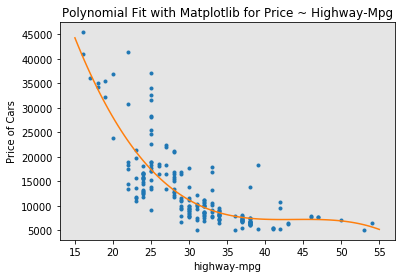

In [815]:
PlotPolly(p,x,y,'highway-mpg')

In [752]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

<h3> Conclusion </h3> 

If using Highway-Mpg to predict the price of a car, it will be better done with polynomial regression rather than SLR using the formula 

<b> price </b> = $$-1.557 x^3 + 204.8 x^2 - 8965 x + 1.379e+05 $$

where the x up to its cubic order will be highway-mpg units 

In [766]:
#Curb-Weight 
autos_df['curb-weight'].max() 

4066

In [767]:
autos_df['curb-weight'].min()

1488

In [907]:
def PlotPollyCW (model, independent_variable, dependent_variable, Name): 
    x_new1 = np.linspace(1487,4067,100)
    y_new1 = model(x_new1)
    
    plt.plot(independent_variable, dependent_variable, '.', x_new1, y_new1, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Curb-Weight')
    ax = plt.gca() 
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    
    plt.show()
    plt.close()

In [908]:
#Curb-Weight 
#Variables 
x1 = autos_df['curb-weight']
y1 = autos_df['price']

In [914]:
#Fitting the polynomial using polyfit and poly1D 
f1 = np.polyfit(x1,y1,3)
p1 = np.poly1d(f1)

print(p1)

          3            2
6.22e-07 x - 0.001546 x + 6.871 x - 5555


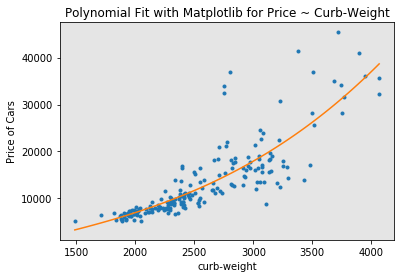

In [915]:
PlotPollyCW(p1,x1,y1,'curb-weight')

<h3> Conclusion </h3> 

If using Curb-Weight to predict the price of a car, it will be better done with polynomial regression rather than SLR using the formula 

<b> price </b> =    
                      
$$6.22e-07 x^3 - 0.001546 x^2 + 6.871 x - 5555$$

where the x up to its cubic order will be curb-weight units 

In [782]:
autos_df['engine-size'].max()

326

In [783]:
autos_df['engine-size'].min()

61

In [824]:
def PlotPollyES (model, independent_variable, dependent_variable, Name): 
    x_new2 = np.linspace(60, 327, 100)
    y_new2 = model(x_new2)
    
    plt.plot(independent_variable, dependent_variable, '.', x_new2, y_new2, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Engine-Size')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel (Name)
    plt.ylabel('Price of Cars')
    
    plt.show() 
    plt.close() 

In [785]:
#Engine-Size 
#Variables 
x2 = autos_df['engine-size']
y2=autos_df['price']

In [786]:
#Fitting the polynomial using polyfit and poly1D 
f2 = np.polyfit(x2,y2,3)
p2 = np.poly1d(f2)

print(p2)

           3         2
-0.006641 x + 3.645 x - 433.4 x + 2.208e+04


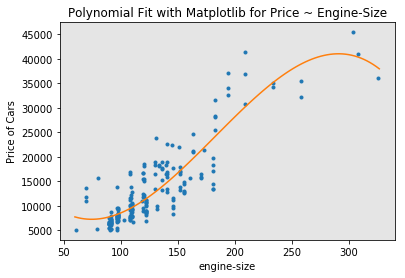

In [787]:
PlotPollyES(p2, x2, y2, 'engine-size')

<h3> Conclusion </h3> 

If using Engine-Size to predict the price of a car, it will be better done with polynomial regression rather than SLR using the formula 

<b> price </b> =    
                 
$$-0.006641 x^3 + 3.645 x^2 - 433.4 x + 2.208e+04$$

where the x up to its cubic order will be engine-size units 

In [803]:
autos_df['horsepower'].max()

262

In [789]:
autos_df['horsepower'].min()

48

In [799]:
def PlotPollyHP (model, independent_variable, dependent_variable, Name): 
    x_new3 = np.linspace(46, 265, 100)
    y_new3 = model(x_new3)
    
    plt.plot(independent_variable, dependent_variable, '.', x_new3, y_new3, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Engine-Size')
    
    ax=plt.gca()
    ax.set_facecolor((0.7, 0.7, 0.7))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    
    
    plt.show()
    plt.close()

In [800]:
#Horsepower 
#Variables 
x3 = autos_df['horsepower']
y3 = autos_df['price']

In [801]:
#Fitting the polynomial using polyfit and poly1D 
f3 = np.polyfit(x3,y3,3)
p3 = np.poly1d(f3)
print(p3)

           3         2
-0.004368 x + 2.039 x - 112.4 x + 7174


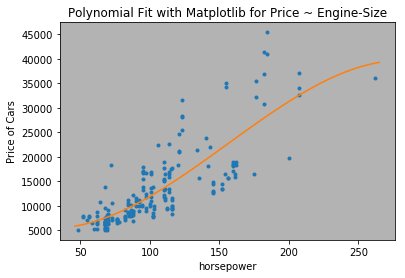

In [802]:
PlotPollyHP(p3, x3, y3,'horsepower')

<h3> Conclusion </h3> 

If using Horsepower to predict the price of a car, it will be better done with polynomial regression rather than SLR using the formula 

<b> price </b> =  
                 
$$-0.004368 x^3 + 2.039 x^2 - 112.4 x + 7174$$

where the x up to its cubic order will be additional horsepower units 

<h1 align=center><font size=5>Quantitative Model Evaluation-Post Visualization</font></h1>

<h3> Strategy to Quantiatively Measure our Model </h3> 



<li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>



<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).</p>

In [825]:
from sklearn.preprocessing import PolynomialFeatures 

In [827]:
pr = PolynomialFeatures (degree=2)
pr
z_pr = pr.fit_transform(z)

In [829]:
z.shape

(201, 4)

In [830]:
z_pr.shape

(201, 15)

<h3> Pipelining </h3> 
<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>

In [834]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler

I will create a pipeline by creating a list of tuples including the name of the model or estimator and it's corresponding constructor. 

In [836]:
Input = [('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias = False)),('model', LinearRegression())]

In [839]:
pipe = Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [840]:
pipe.fit(z,y)

/Users/sahilkohli/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/sahilkohli/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [842]:
ypipe = pipe.predict(z)
ypipe[0:4]

/Users/sahilkohli/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13103.67557905, 13103.67557905, 18229.84126783, 10394.17656982])

<h3> Quantitative Model Measurement Analytics </h3> 


<b> Model 1. Simple Linear Regression </b> 

In [888]:
#highwaympg variable defines 
x_r = autos_df[['highway-mpg']]
y_r = autos_df[['price']]

In [889]:
lm.fit(x_r, y_r)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [890]:
print("The R-square value between Highway-Mpg & Price is", lm.score(x_r, y_r))

The R-square value between Highway-Mpg & Price is 0.4965911884339175


<b> R-square conclusion: </b> ~ 49.659 % of the varation of the price is explained by this simple linear model - "highway_mpg_fit"

In [847]:
yhat=lm.predict(x_r)
yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

<b> Mean Squared Error </b> 

In [849]:
from sklearn.metrics import mean_squared_error 

In [851]:
mse = mean_squared_error(autos_df['price'], yhat)
print (' The mean squared error of price and predicted value is:', mse)

 The mean squared error of price and predicted value is: 31635042.944639895


In [865]:
#curb-weight_variable assignment 
x_r_1 = autos_df[['curb-weight']]
y_r_1 = autos_df[['price']]

In [866]:
#curb-weight-fit 
lm.fit(x_r_1, y_r_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [867]:
print("The R-square value between Curb Weight & Price is:", lm.score(x_r_1,y_r_1))

The R-square value between Curb Weight & Price is: 0.6962476008164488


<b> R-square conclusion: </b> ~ 69.624 % of the varation of the price is explained by this simple linear model - "curb-weight"

<b> Mean Squared Error </b> 

In [868]:
yhat = lm.predict(x_r_1)
yhat[0:5]

array([[13108.85152621],
       [13108.85152621],
       [16634.03445191],
       [10404.07480868],
       [16646.85329891]])

In [869]:
mse1 = mean_squared_error(autos_df['price'], yhat)
print('The mean squared error of price and predicted value is:', mse1)

The mean squared error of price and predicted value is: 19088303.525747165


In [870]:
#engine-size variable assignment 
x_r_2 = autos_df[['engine-size']]
y_r_2 = autos_df[['price']]

In [871]:
lm.fit(x_r_2, y_r_2) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [872]:
print("The R-square value between Engine-Size & Price is:", lm.score(x_r_2,y_r_2))

The R-square value between Engine-Size & Price is: 0.7609686443622008


<b> R-square conclusion: </b> ~ 76.096 % of the varation of the price is explained by this simple linear model - "engine_size_fit"

<b> Mean Squared Error </b> 

In [873]:
yhat = lm.predict(x_r_2)
yhat[0:5]

array([[13728.4631336 ],
       [13728.4631336 ],
       [17399.38347881],
       [10224.40280408],
       [14729.62322775]])

In [875]:
mse2 = mean_squared_error(autos_df['price'], yhat)

In [876]:

print("The Mean Squared Error of price and predicted value is:", mse2)

The Mean Squared Error of price and predicted value is: 15021126.02517414


In [877]:
#horsepower_variable_assignment 
x_r_3 = autos_df[['horsepower']]
y_r_3 = autos_df[['price']]

In [878]:
lm.fit(x_r_3, y_r_3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [879]:
print("The R-square value between Horsepower & Price is:", lm.score(x_r_3, y_r_3))

The R-square value between Horsepower & Price is: 0.6556611105366588


<b> R-square conclusion: </b> ~ 65.566 % of the varation of the price is explained by this simple linear model - "horsepower_fit"

<b> Mean Squared Error <b> 

In [880]:
yhat = lm.predict(x_r_3)
yhat[0:5]

array([[14517.17297231],
       [14517.17297231],
       [21922.47513036],
       [12967.226009  ],
       [15206.03828934]])

In [882]:
mse3 = mean_squared_error(autos_df['price'] , yhat)
print("The Mean Squared Error of price and predicted value is:", mse3)

The Mean Squared Error of price and predicted value is: 21638825.752362628


<b> Model 2: Multiple Linear Regression </b> 

In [883]:
#Variable Assignment Z 
z = autos_df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [884]:
lm.fit(z,autos_df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [885]:
print("The R-squared for our MLR model - containing features: horsepower, curb-weight, engine-size, highway-mpg- is:", lm.score(z,autos_df['price']))

The R-squared for our MLR model - containing features: horsepower, curb-weight, engine-size, highway-mpg- is: 0.8094390422815299


<b> R-square conclusion: </b> ~ 80.943 % of the varation of the price is explained by this multiple linear regression model - "highway_mpg, curb_weight, engine_size, horsepower_fit" 

<b> Mean Squared Error for MLR Model <b> 

In [886]:
yhat = lm.predict(z)
yhat[0:5]

array([13698.95609311, 13698.95609311, 19056.78572196, 10621.59764327,
       15519.32197778])

In [887]:
mse_mlr = mean_squared_error(autos_df['price'], yhat)
print("The Mean Squared Error of our MLR model - containing features: horsepower, curb-weight, engine-size and highway-mpg is:", mse_mlr)

The Mean Squared Error of our MLR model - containing features: horsepower, curb-weight, engine-size and highway-mpg is: 11975165.99330355


<b> Model 3: Polynomial Fit </b> 

Calculating the R-square for a polynomial fit is a little different from our other models. 

In [899]:
#import r2_score from the module metrics 
from sklearn.metrics import r2_score 

In [900]:
#Highway MPG - Polynomial Fit 
x = autos_df['highway-mpg']
y = autos_df['price']
f = np.polyfit(x,y,3)
p = np.poly1d(f)

In [901]:
r_squared = r2_score (y, p(x))
print("The R-square value is:", r_squared)

The R-square value is: 0.674194666390652


<b> R-square conclusion: </b> ~ 67.419 % of the varation of the price is explained by this Polynomial model - "highway_mpg_fit"

<b> Mean Squared Error </b> - <i> Polynomial Fit </i> 

In [924]:
mean_squared_error_poly = mean_squared_error(autos_df['price'], p(x))
print("The Mean Squared Error of the Polynomial Fit for highway_mpg_fit is:", mean_squared_error_poly)

The Mean Squared Error of the Polynomial Fit for highway_mpg_fit is: 20474146.42636121


In [902]:
#Curb Weight - Polynomial Fit 
x1 = autos_df['curb-weight']
y1 = autos_df['price']
f1 = np.polyfit(x1,y1,3)
p1 = np.poly1d(f)

In [918]:
r_squared1 = r2_score (y1,p1(x1))
print("The R-square value is:", r_squared1 )

The R-square value is: 0.7200741668185304


<b> R-square conclusion: </b> ~ 72.007 % of the varation of the price is explained by this Polynomial model - "curb_weight_fit"

<b> Mean Squared Error </b> - <i> Polynomial Fit </i> 

In [926]:
mean_squared_error_poly1 = mean_squared_error(autos_df['price'], p1(x1))
print("The Mean Squared Error of the Polynomial Fit for curb_weight_fit is:", mean_squared_error_poly1)

The Mean Squared Error of the Polynomial Fit for highway_mpg_fit is: 17591002.68122231


In [917]:
#Engine-Size - Polynomial Fit 
x2 = autos_df['engine-size']
y2=autos_df['price']
f2 = np.polyfit(x2,y2,3)
p2 = np.poly1d(f2)

In [919]:
r_squared2 = r2_score(y2, p2(x2))
print("The R-square value is:", r_squared)

The R-square value is: 0.674194666390652


<b> R-square conclusion: </b> ~ 67.419 % of the varation of the price is explained by this Polynomial model - "engine_size_fit"

<b> Mean Squared Error </b> - <i> Polynomial Fit </i> 

In [928]:
mean_squared_error_poly2 = mean_squared_error(autos_df['price'], p2(x2))
print("The Mean Squared Error of the Polynomial Fit for engine_size_fit is:", mean_squared_error_poly2)

The Mean Squared Error of the Polynomial Fit for engine_size_fit is: 13187196.08355574


In [920]:
#Horsepower Polynomial Fit 
x3 = autos_df['horsepower']
y3 = autos_df['price']
f3 = np.polyfit(x3,y3,3)
p3 = np.poly1d(f3)

In [921]:
r_squared3 = r2_score(y3, p3(x3))
print("The R square value is:", r_squared3)

The R square value is: 0.6629872612965503


<b> R-square conclusion: </b> ~ 67.419 % of the varation of the price is explained by this Polynomial model - "horsepower_fit"

<b> Mean Squared Error </b> - <i> Polynomial Fit </i> 

In [930]:
mean_squared_error_poly4 = mean_squared_error(autos_df['price'],p3(x3))
print("The Mean Squared Error of the Polynomial Fit for horsepower_fit is:", mean_squared_error_poly4)

The Mean Squared Error of the Polynomial Fit for horsepower_fit is: 21178438.312605523


<h2>Prediction and Decision Making</h2>
<h3>Prediction</h3>

<i> Simple Linear Regression Model </i> 

In [932]:
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

In [934]:
#Creating a new input range 
new_input=np.arange(1,100,1).reshape(-1,1)

In [943]:
x = autos_df[['highway-mpg']]
y = autos_df[['price']]

In [944]:
lm.fit(x,y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [945]:
yhat_predict = lm.predict(new_input)
yhat_predict[0:5]

array([[37601.57247984],
       [36779.83910151],
       [35958.10572319],
       [35136.37234487],
       [34314.63896655]])

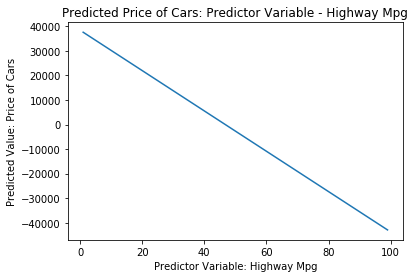

In [950]:
plt.plot(new_input, yhat_predict)
plt.title("Predicted Price of Cars: Predictor Variable - Highway Mpg")
plt.xlabel ('Predictor Variable: Highway Mpg')
plt.ylabel('Predicted Value: Price of Cars')
plt.show()


In [ ]:
#CurbWeight

In [951]:
x1 = autos_df[['curb-weight']] 
y1 = autos_df[['price']]

In [952]:
lm.fit(x1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [953]:
autos_df['curb-weight'].max()

4066

In [954]:
autos_df['curb-weight'].min()

1488

In [956]:
new_input1 = np.arange(1488,4066,1).reshape(-1,1)

In [958]:
yhat_predict1=lm.predict(new_input1)
yhat_predict1[0:5]

array([[-479.12629647],
       [-466.30744946],
       [-453.48860246],
       [-440.66975546],
       [-427.85090846]])

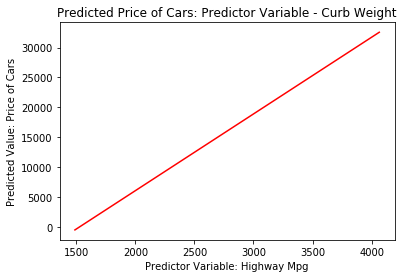

In [973]:
plt.plot(new_input1, yhat_predict1,color='red')
plt.title('Predicted Price of Cars: Predictor Variable - Curb Weight')
plt.xlabel ('Predictor Variable: Highway Mpg')
plt.ylabel ('Predicted Value: Price of Cars')
plt.show()

In [961]:
#Engine-Szie 
x2 = autos_df[['engine-size']]
y2 = autos_df[['price']]

In [967]:
lm.fit(x2,y2)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [963]:
autos_df['engine-size'].max()

326

In [964]:
autos_df['engine-size'].min()

61

In [966]:
new_input2=np.arange(60, 330, 1).reshape(-1,1)


In [968]:
yhat_predict2 = lm.predict(new_input2)
yhat_predict2[0:5]

array([[2048.2620352 ],
       [2215.1220509 ],
       [2381.98206659],
       [2548.84208228],
       [2715.70209797]])

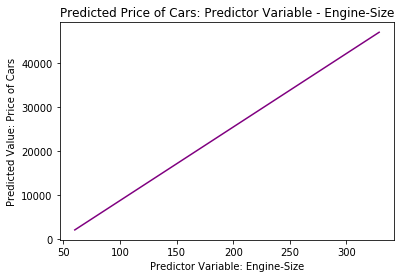

In [974]:
plt.plot(new_input2, yhat_predict2,color='purple')
plt.title('Predicted Price of Cars: Predictor Variable - Engine-Size')
plt.xlabel ('Predictor Variable: Engine-Size')
plt.ylabel('Predicted Value: Price of Cars')
plt.show()

In [975]:
#horsepower 
x3 = autos_df[['horsepower']]
y4 = autos_df[['price']]


In [976]:
lm.fit(x3,y4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [977]:
autos_df['horsepower'].max()

262

In [978]:
autos_df['horsepower'].min()

48

In [979]:
new_input3 = np.arange(46,265,1).reshape(-1,1)

In [980]:
yhat_predict3 = lm.predict(new_input3)
yhat_predict3[0:5]

array([[3323.1115706 ],
       [3495.32789986],
       [3667.54422912],
       [3839.76055837],
       [4011.97688763]])

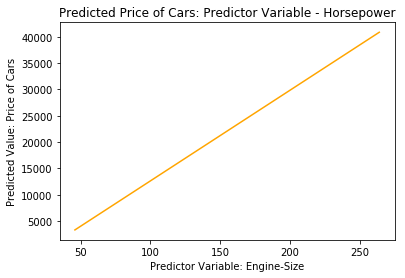

In [981]:
plt.plot(new_input3, yhat_predict3, color='orange')
plt.title ('Predicted Price of Cars: Predictor Variable - Horsepower')
plt.xlabel ('Predictor Variable: Engine-Size')
plt.ylabel ('Predicted Value: Price of Cars')
plt.show()

<h3> Decision Making: Evaluating the Best Models </h3> 

 <b> Simple Linear Regression </b> 
   
   
  * Highway_mpg (as a predictor for price): <b> R-squared: </b> 0.4965911884339175
    and <b> MSE: </b> 31635042.944639895
    
  * Curb_weight (as a predictor for price): <b> R-squared: </b> 0.6962476008164488 and <b> MSE: </b>  19088303.525747165
  
  * Engine-Size (as a predictor for price): <b> R-squared: </b> 0.7609686443622008 and <b> MSE: </b> 15021126.02517414
  
  * Horsepower (as a predictor for price): <b> R-squared: </b> 0.6556611105366588 and <b> MSE: </b> 21638825.752362628
    
 

<b> Multiple Linear Regression: </b>
* The <b> R-squared </b> for our MLR model - containing features: horsepower, curb-weight, engine-size, highway-mpg- is: 0.8094390422815299
* <b> The Mean Squared Error: </b> 11975165.99330355


<b> Polynomial Fit Modeling: </b> 
* Highway_mpg (as a predictor for price): <b> R-squared: </b> 0.674194666390652
    and <b> MSE: </b> 20474146.42636121
    
* Curb_weight (as a predictor for price): <b> R-squared: </b> 0.7200741668185304 and <b> MSE: </b>  17591002.68122231
  
* Engine-Size (as a predictor for price): <b> R-squared: </b> 0.674194666390652 and <b> MSE: </b> 13187196.08355574
  
* Horsepower (as a predictor for price): <b> R-squared: </b> 0.6629872612965503 and <b> MSE: </b> 21178438.312605523

<h3> Concluding Thoughts: Decision Making - Evaluation of the best Models </h3> 

* Highway_mpg (as a predictor for price): 1) MLR 2) Polynomial 3) SLR 
* Curb_weight (as a predictor for price): 1) MLR 2) Polynomial 3) SLR 
* Engine-Size (as a predictor for price): 1) MLR 2) SLR 3) Polynomial
* Horsepower (as a predictor for price): 1) MLR 2) Polynomial 3) SLR 


Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.

<h1 align=center><font size=5>Model Evaluation & Refinement</font></h1>

In [982]:
#get numeric data 
numeric_data_df=autos_df._get_numeric_data() 
numeric_data_df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,city-L/100km,highway-L/100km,length_normalized,width_normalized,height_normalized,horespower_binned,std,turbo,diesel,gas
0,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,11.190476,8.703704,0.811148,0.890278,0.816054,111,1,0,0,1
1,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,11.190476,8.703704,0.811148,0.890278,0.816054,111,1,0,0,1
2,1,122,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,12.368421,9.038462,0.822681,0.909722,0.876254,154,1,0,0,1
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,9.791667,7.833333,0.848630,0.919444,0.908027,102,1,0,0,1
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,13.055556,10.681818,0.848630,0.922222,0.908027,115,1,0,0,1


<b> Libraries Necessary for Plotting </b> 

In [986]:
%%capture 
! pip install ipywidgets

In [994]:
!pip3 install --upgrade notebook

Requirement already up-to-date: notebook in /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages (6.0.1)
You are using pip version 19.0.3, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [995]:
from IPython.display import display
from IPython.html import widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

<h3> Functions for Plotting </h3> 

In [996]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title): 
    width = 12 
    height = 10 
    plt.figure(figsize=(width, height))
    
    ax1 = sns.distplot(RedFunction, hist = False, color = 'red', label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color = 'blue', label=BlueName, ax=ax1)
    
    plt.title(Title)
    plt.xlabel ('Price of cars (in dollars)')
    plt.ylabel('Proportion of Cars')
    
    plt.show() 
    plt.close()

In [997]:
def PollyPlotnew(xtrain, xtest, y_train, y_test, lr, poly_transform): 
    width = 12 
    height = 10 
    plt.figure(figsize=(width, height))
    
    #training data 
    #testing data 
    #lr: linear regression object 
    #poly_transform: polynomial transformation object 
    
    xmax = max ([xtrain.values.max(), xtest.values.max()])
    
    xmin = min ([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin,xmax,0.1)
    
    plt.plot(xtrain,y_train,'ro', label='Training Data')
    plt.plot(xtest,y_test,'go',label='Test Data')
    plt.plot(x,lr.predict(poly_transform.fit_transform(x.reshape(-1,1))), label = 'Predicted Function')
    plt.ylim([-10000,60000])
    plt.ylabel('Price')
    plt.legend()
    

<h1> Training & Testing </h1> 

We will split the data into <b> training </b> and <b> testing </b> data. We will place the target data price into a separate dataframe as well. 

In [1001]:
y_data = numeric_data_df['price']

In [1006]:
x_data=numeric_data_df.drop('price', axis=1)

Now, I will randomply split the data into <b> training </b> and <b> testing </b> data using the function <b> train test split </b> 

Below, I will test different training and testing data splits as well as their corresponding R^2

In [1008]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state =1 )

print('Number of test samples:', x_test.shape[0])
print('Number of training samples:', x_train.shape[0])

Number of test samples: 31
Number of training samples: 170


In [1009]:
from sklearn.linear_model import LinearRegression

In [1011]:
Lre = LinearRegression()
Lre

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1013]:
#test the fit against an indepenedent variable - I will use horsepower
Lre.fit(x_train[['horsepower']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1016]:
Lre.score(x_train[['horsepower']],y_train)

0.6452360287689862

Compare results to the R^2 for the testing data

In [1017]:
Lre.score(x_test[['horsepower']], y_test) 

0.7077268461241428

In [1103]:
#yhat_train 
#Hp1 - 70 % Test 
#Hp1 - 30 % Train 

yhat_train_hp1 = Lre.predict(x_train[['horsepower']])
yhat_train_hp1

array([10635.99154511, 12821.51676865,  7441.76237223, 22908.55626194,
       22740.43893705, 15343.27664197,  9627.28759578, 21395.50033795,
       16520.09791619,  7273.64504734, 11812.81281932, 19882.44441395,
        9963.52224555, 26439.02008459,  9963.52224555,  7609.87969712,
        7273.64504734, 10299.75689533, 22740.43893705, 13157.75141843,
       23076.67358683,  7273.64504734, 11308.46084466, 12821.51676865,
        8618.58364645,  4583.76784913,  7609.87969712, 15343.27664197,
       15007.0419922 , 12653.39944376, 21899.85231261,  7441.76237223,
        6264.94109801,  8954.81829622,  3911.29854958, 14334.57269264,
       10972.22619488, 21395.50033795,  7273.64504734, 16520.09791619,
       11812.81281932, 12821.51676865, 22067.9696375 , 12149.0474691 ,
        7273.64504734, 15343.27664197, 12989.63409354, 16183.86326641,
       10635.99154511,  7441.76237223, 30641.95320679,  5256.23714869,
       30641.95320679, 20218.67906373,  7273.64504734, 14334.57269264,
      

In [1102]:
yhat_test_hp1 = Lre.predict(x_test[['horsepower']])
yhat_test_hp1

array([12149.0474691 ,  7273.64504734,  9963.52224555,  8618.58364645,
       15343.27664197,  6264.94109801, 20218.67906373, 10635.99154511,
       15175.15931709,  7609.87969712, 11308.46084466,  8618.58364645,
       15343.27664197, 16183.86326641, 14502.69001753, 12149.0474691 ,
        5592.47179846, 13662.10339309,  7441.76237223, 10131.63957044,
       10299.75689533,  7609.87969712, 26439.02008459, 11812.81281932,
        5928.70644824, 25430.31613526, 15343.27664197,  7273.64504734,
       11308.46084466,  7441.76237223, 15007.0419922 ])

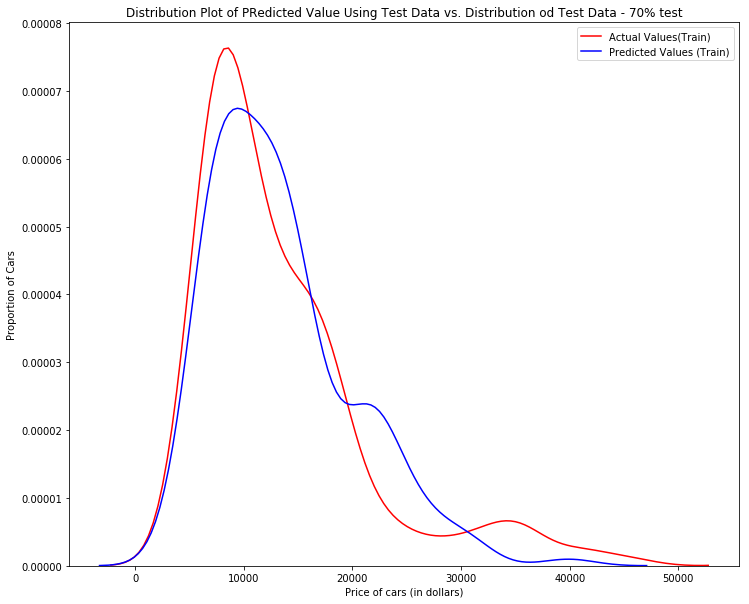

In [1115]:
#Distplot Train 



#Training 
#Distribution Plot - 90% training, 10% testing 
DistributionPlot(y_train,yhat_train_hp1,'Actual Values(Train)', 'Predicted Values (Train)', 'Distribution Plot of PRedicted Value Using Test Data vs. Distribution od Test Data - 70% test')






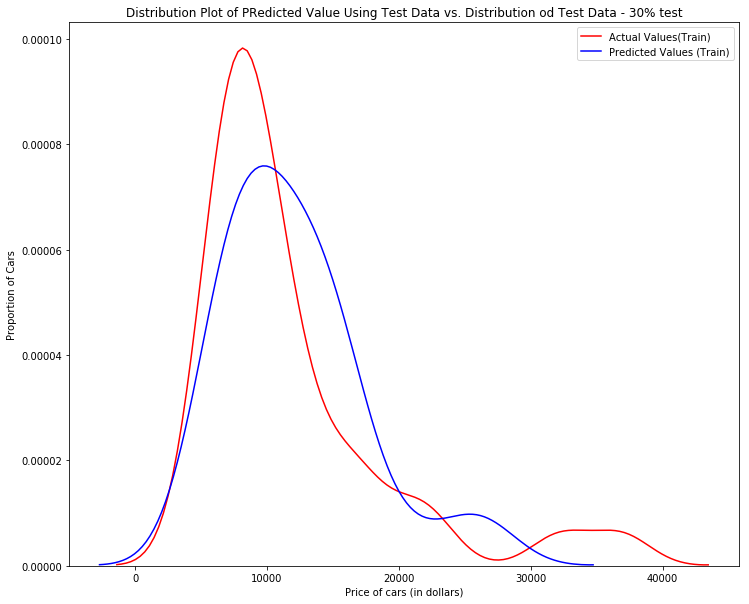

In [1114]:
#Distplot Test 
#Training 
#Distribution Plot - 90% training, 10% testing 
DistributionPlot(y_test,yhat_test_hp1,'Actual Values(Train)', 'Predicted Values (Train)', 'Distribution Plot of PRedicted Value Using Test Data vs. Distribution od Test Data - 30% test')

<h3> Takeaway </h3> 

Simulating our Results one more time - with training data at 90% and testing data at 10% 

In [1040]:
#reassign our train_test_split model 

x_train1,x_test1,y_train1,y_test1 = train_test_split(x_data,y_data,test_size=0.10, random_state=1)
print("The Number of training data samples we have is:", x_train.shape[0])
print("The Number of testing data samples we have is:", x_test.shape[0])


The Number of training data samples we have is: 170
The Number of testing data samples we have is: 31


In [1041]:
Lre1 = LinearRegression()
Lre1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1042]:
#Training Data_Lre_Model_Fit
Lre1.fit(x_train1[['horsepower']],y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1043]:
Lre1.score(x_train1[['horsepower']],y_train1)

0.6622424809407366

In [1044]:
Lre1.fit(x_test1[['horsepower']],y_test1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1049]:
Lre1.score(x_test1[['horsepower']],y_test1)

0.41827774184282707

In [1088]:
#hp2 - 90% Training 
#hp2 - 10% Testing 
yhat_train_hp2 = Lre1.predict(x_train1[['horsepower']])
yhat_train_hp2

array([ 7518.39388369, 22940.10667335, 10960.74048852,  6141.45524176,
       22113.94348819, 13852.31163659,  7243.0061553 , 10547.65889594,
        7380.7000195 , 13576.9239082 ,  9996.88343917, 11786.90367369,
        7380.7000195 , 20048.53552529, 19910.8416611 , 13852.31163659,
        9170.72025401, 18809.29074755, 14816.16868594,  7243.0061553 ,
       10960.74048852, 17570.04596981,  9446.1079824 , 22940.10667335,
        9446.1079824 ,  7518.39388369,  7243.0061553 ,  9721.49571078,
       19910.8416611 , 12062.29140207, 20186.22938948,  7243.0061553 ,
       10547.65889594, 11786.90367369,  8344.55706885,  5039.90432821,
        7518.39388369, 13852.31163659, 13576.9239082 , 11649.20980949,
       19222.37234013,  7380.7000195 ,  6416.84297014,  8619.94479724,
        4489.12887143, 13026.14845143, 10272.27116756, 18809.29074755,
        7243.0061553 , 14816.16868594, 10960.74048852, 11786.90367369,
       19360.06620432, 11236.12821691,  7243.0061553 , 13852.31163659,
      

In [1089]:
#hp2 - 90% Training 
#hp2 - 10% Testing 
yhat_test_hp2 = Lre1.predict(x_test1[['horsepower']])
yhat_test_hp2

array([11236.12821691,  7243.0061553 ,  9446.1079824 ,  8344.55706885,
       13852.31163659,  6416.84297014, 17845.4336982 ,  9996.88343917,
       13714.61777239,  7518.39388369, 10547.65889594,  8344.55706885,
       13852.31163659, 14540.78095755, 13163.84231562, 11236.12821691,
        5866.06751337, 12475.37299465,  7380.7000195 ,  9583.80184659,
        9721.49571078])

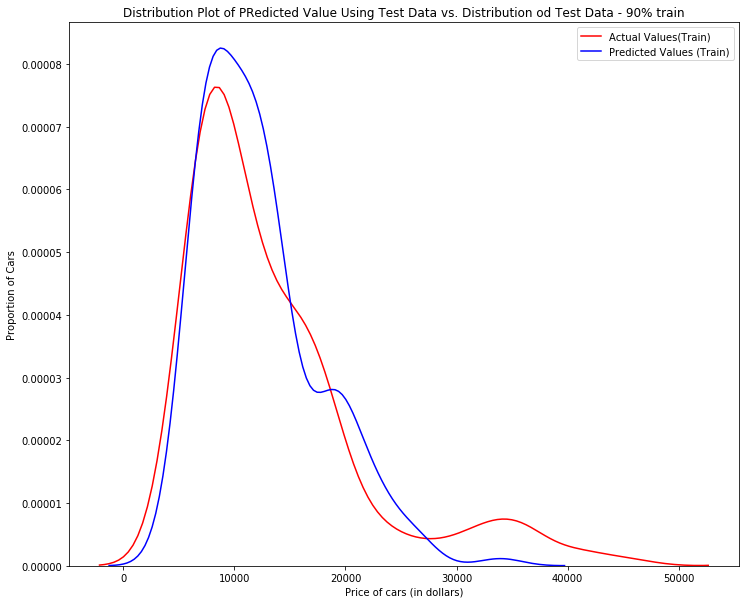

In [1093]:
#Training 
#Distribution Plot - 90% training, 10% testing 
DistributionPlot(y_train1,yhat_train_hp2,'Actual Values(Train)', 'Predicted Values (Train)', 'Distribution Plot of PRedicted Value Using Test Data vs. Distribution od Test Data - 90% train')

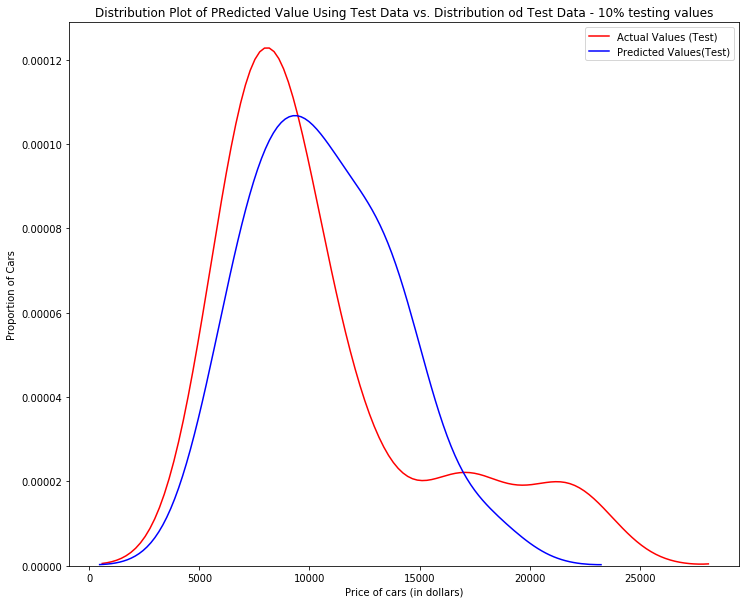

In [1092]:
#Testing 
DistributionPlot(y_test1, yhat_test_hp2,'Actual Values (Test)', 'Predicted Values(Test)','Distribution Plot of PRedicted Value Using Test Data vs. Distribution od Test Data - 10% testing values')


<h3> Takeaway </h3> 

<h3> Cross Validation: A Method for Out of Sample Evaluation Metric </h3> 
Each observation will be used both for training and testing data to get the most unbiased R^2 value. In this case, I will set the number of folds to 4. 


In [1047]:
#importing cross_val_score
from sklearn.model_selection import cross_val_score 

In [1051]:
Rcross = cross_val_score(Lre,x_data[['horsepower']],y_data, cv=4)
Rcross

array([0.77477095, 0.51725019, 0.74924821, 0.04771764])

In [1054]:
#Average of our R^(2) and Std of our R^(2) with cross validation 

print("The Average of R^2 of our cross validation with four-folds is:", Rcross.mean(), "The Standard Deviation of R^2 of our cross validation with four folds is:", Rcross.std())


The Average of R^2 of our cross validation with four-folds is: 0.522246748197947 The Standard Deviation of R^2 of our cross validation with four folds is: 0.2917623074182639


I can use negative squared error as a score by setting the parameter scoring metric to neg_mean_squared_error

In [1057]:
- 1 * cross_val_score(Lre,x_data[['horsepower']],y_data, cv=4, scoring = 'neg_mean_squared_error')

array([20240865.23167852, 43737944.37864215, 12470270.77569642,
       17574447.87971662])

<h3> Using the Cross Validation Method To Predict the Output </h3> 
This function will split up the data into the specified number of folds, using one fold to get a prediction, while the rest of the folds are used as test data.

In [1059]:
#import cross_val_predict 
from sklearn.model_selection import cross_val_predict 

In [1060]:
yhat_crossvalpredict = cross_val_predict(Lre, x_data[['horsepower']],y_data, cv=4)
yhat_crossvalpredict[0:10]

array([14144.56553323, 14144.56553323, 20819.140433  , 12747.56148444,
       14765.45622158, 13989.34286114, 13989.34286114, 13989.34286114,
       18646.02302377, 12592.33881236])

In [1067]:
print("The predicted price for a car using the feature for horsepower as well as cross_val_predict is:", yhat_crossvalpredict.mean()) 
print(" ")
print("The Standard Deviation for a car using the feature for horsepower as well as cross_val_predict is:", yhat_crossvalpredict.std())


The predicted price for a car using the feature for horsepower as well as cross_val_predict is: 13200.415589400423
 
The Standard Deviation for a car using the feature for horsepower as well as cross_val_predict is: 6351.59739547946


<h3> Part II: Model Evaluation - Overfitting, Underfitting and Model Selection </h3> 
    Test data (out of sample data) is a much better measure/indicator of our model's performance in the real world. The main reason for this is overfitting. Since this applies a lot more to MLR and Polynomial Modeling, this is what the next phase of my Model Evaluation will focus on 

In [1070]:
#Re-referencing some of our other code for distinguishment 
# Do not want to over ride the previous values stored 
x_data=numeric_data_df.drop('price', axis=1)
y_data= numeric_data_df['price']

In [1083]:
from sklearn.model_selection import train_test_split 

x_train2, x_test2, y_train2, y_test2 = train_test_split(x_data, y_data, test_size=0.15, random_state =1 )

print('Number of training samples:', x_train2.shape[0])
print('Number of test samples:', x_test2.shape[0])


Number of training samples: 170
Number of test samples: 31


In [1074]:
#Setting up a new linear regression object and training the model using 1) horsepower
#2) curb-weight , 3) engine-size, 4) highway-mpg
Lr_modelevaluation = LinearRegression()
Lr_modelevaluation.fit(x_train2[['horsepower','curb-weight','engine-size', 'highway-mpg']], y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1077]:
#Prediction Using Training Data 
yhat_train = Lr_modelevaluation.predict(x_train2[['horsepower','curb-weight', 'engine-size','highway-mpg']])
yhat_train[0:5]

array([11925.51597162, 11236.6527772 ,  6436.475254  , 21894.48350917,
       16676.47106746])

In [1078]:
#Prediction Using Testing Data 
yhat_test = Lr_modelevaluation.predict(x_test2[['horsepower','curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11350.75103537,  5915.12582439, 11241.79112508,  6661.69377173,
       15556.64712328])

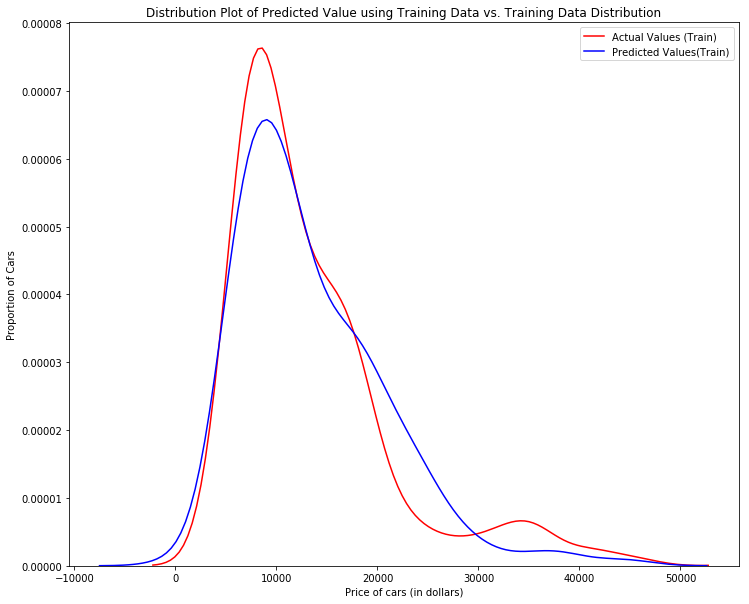

In [1086]:
#training data - 90% 
# testing data - 10% 
Title = 'Distribution Plot of Predicted Value using Training Data vs. Training Data Distribution'
DistributionPlot(y_train2,yhat_train, 'Actual Values (Train)', 'Predicted Values(Train)',Title)

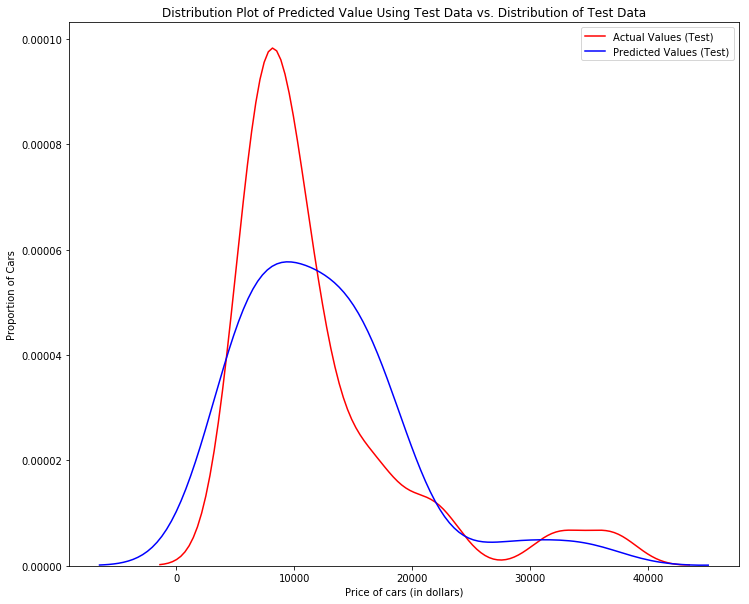

In [1087]:
#Training Data - 90% 
#Testing Data - 10% 

Title = 'Distribution Plot of Predicted Value Using Test Data vs. Distribution of Test Data'
DistributionPlot(y_test2, yhat_test, 'Actual Values (Test)', 'Predicted Values (Test)', Title)

Comparing Figure 1 and Figure 2, it is evident that the distribution of the training data in Figure 1 is much better at fitting the data. The difference is in Figure 2 that our data (predicted) is ranging from 5000 to 15,000. 

Now, I will test to see if polynomial regression also exhibits a drop in the prediction accuracy when analayzing the dataset. 

<b> Overfitting </b> 
Overfitting occurs when the model fits the noise, not the underlying process. Thus, when testing the model using the test set, the model does not perform as well as it is modelling noise, not the underlying process that generated the relationship. 

In [1082]:
from sklearn.preprocessing import PolynomialFeatures 

In [1132]:
#Train Variables for Polynomial Regression 
#Test Variables for Polynomial Regression 
# Testing - 55% 
# Training - 45% 
x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [1137]:
print("The training data number is:", x_train_poly.shape[0])
print("The testing data number is:", x_test_poly.shape[0])

The training data number is: 110
The testing data number is: 91


In [1126]:
import numpy as np 

In [1141]:
# Polynomial Regression Model 
# We will perform a degree 5 polynomial transformation on the feature - horsepower 
# 55% of data - will be training 
# 45% of data - will be testing 
# Feature - horsepower 
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train_poly[['horsepower']])
x_test_pr = pr.fit_transform(x_test_poly[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)

In [1140]:
#Creating a linear regression model poly and training it 
poly_lr = LinearRegression()

In [1143]:
poly_lr.fit(x_train_pr,y_train_poly )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1144]:
yhat_poly_prediction = poly_lr.predict(x_test_pr)
yhat_poly_prediction[0:5]

array([ 6722.89265525,  7301.4245123 , 12214.14239065, 18901.65805564,
       20000.21300103])

In [1145]:
print("The Predicted Values are:", yhat_poly_prediction[0:5])
print("")
print("The Actual Values are:", y_test_poly[0:5].values)

The Predicted Values are: [ 6722.89265525  7301.4245123  12214.14239065 18901.65805564
 20000.21300103]

The Actual Values are: [ 6295. 10698. 13860. 13499. 15750.]


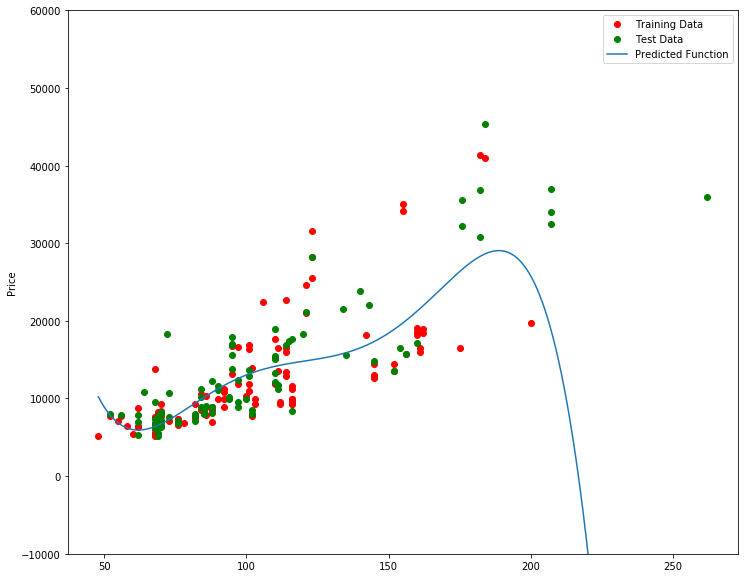

In [1152]:
PollyPlotnew(x_train_poly[['horsepower']], x_test_poly[['horsepower']], y_train_poly, y_test_poly, poly_lr, pr)

<b> Takeaway: </b>


A polynomial regression model, red dots represent training data, green dots represent test data, and the blue line represents the model prediction. 

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.

In [1154]:
#Training Data 
poly_lr.score(x_train_pr, y_train_poly)

0.5571757384933556

In [1155]:
#Testing Data 
poly_lr.score(x_test_pr, y_test_poly)

-29.62440168253653

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87.  The lower the R^2, the worse the model, a Negative R^2 is a sign of overfitting

In [1159]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(3, 0.75, 'Maximum R^2 ')

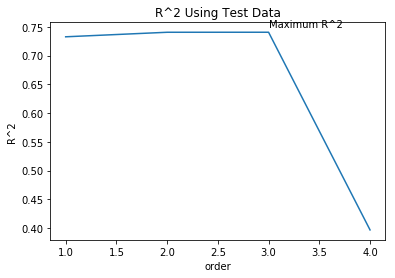

In [1166]:
Rsqu_test = []

order = [1, 2, 3, 4]
for i in order:
    pr = PolynomialFeatures(degree=i)
    
    x_train_pr = pr.fit_transform(x_train_poly[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test_poly[['horsepower']])    
    
    poly_lr.fit(x_train_pr, y_train_poly)
    
    Rsqu_test.append(poly_lr.score(x_test_pr, y_test_poly))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    